In [1]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup

import spacy

# Web Scraping

In [2]:
# Getting reviews from all the pages:

tot_rev=[]
for i in range(1,100):
    url="https://www.amazon.in/Samsung-Galaxy-Storage-Additional-Exchange/product-reviews/B09D8672S9/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(i)
    data_html=requests.get(url)
    soup=BeautifulSoup(data_html.text , 'html.parser')
    reviews = soup.find_all('div' , {'data-hook': 'review'})
   # print(reviews)
    for item in reviews:
        tot_rev.append(item.find('span',{'data-hook':'review-body'}).text.strip())
    

In [3]:
len(tot_rev)

522

In [4]:
df_rev=pd.DataFrame()

In [5]:
df_rev['Reviews']=pd.DataFrame(tot_rev)

In [6]:
df_rev

,Reviews
0,Received the phone two hours ago. Here are my ...
1,"It is 4-6k above what they are charging,it sho..."
2,If you want a Samsung phone under 40k.....go f...
3,"I bought this phone for Rs.31,000. Trust me, I..."
4,Very much Over Priced. Waited so long for A52s...
...,...
517,"It's a good phone in general, love the camera ..."
518,The camera quality is very bad. Pixel gets dis...
519,"The phone seems Ok, but I had a bad experience..."
520,Display is very bad. Colour in display is very...


# Text Processing :

In [7]:
#  Converting all the alphabets to upper or lower case :NORMALIZING THE DATA
df_rev.Reviews=df_rev.Reviews.apply(lambda x: x.lower())

In [8]:
#  Removing URL's from data
df_rev.Reviews=df_rev.Reviews.apply(lambda x: re.sub(r'http\S+', '', x))

In [9]:
#  Removing Usernames from data
df_rev.Reviews=df_rev.Reviews.apply(lambda x: re.sub('@[^\s]+','',x))

In [10]:
# Removing non alphabets
df_rev.Reviews = df_rev.Reviews.apply(lambda x: re.sub('[^a-z,. ]','', x))

In [13]:
# Removing the spaces at the start and end of strings 
rev = [Reviews.strip() for Reviews in df_rev.Reviews]
#rev = [Reviews for Reviews in df_rev if Reviews]  # Removing the empty sentences if any

In [14]:
# Joining all the data

rev_tot=" ".join(rev)

2.Tokenization

In [15]:
from nltk import tokenize

rev_words = tokenize.word_tokenize(" ".join(rev))
rev_words[0:15]

['received',
 'the',
 'phone',
 'two',
 'hours',
 'ago',
 '.',
 'here',
 'are',
 'my',
 'first',
 'impressionsmost',
 'of',
 'the',
 'reviews']

In [16]:
len(rev_words)

25481

3. Stopwords Removal

In [17]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
from nltk.corpus import stopwords
stop_words=stopwords.words('english') # importing stopwords

rev_rem_stopwords=[word  for word in rev_words if word not in stop_words]

In [19]:
rev_rem_stopwords[0:15]

['received',
 'phone',
 'two',
 'hours',
 'ago',
 '.',
 'first',
 'impressionsmost',
 'reviews',
 'made',
 'looking',
 'price',
 'point',
 'specs',
 'sheet']

# NAMED ENTITY RECOGNITION (NER): Just for overall analysis of data

In [20]:
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
rev_comp=" ".join(rev_rem_stopwords)
doc=nlp(rev_comp)
spacy.displacy.render(doc, style='ent')

PARTS OF SPEECH TAGGING:

In [21]:
for token in doc[:]:
    print(token,"--", token.pos_)

received -- VERB
phone -- NOUN
two -- NUM
hours -- NOUN
ago -- ADV
. -- PUNCT
first -- ADJ
impressionsmost -- NOUN
reviews -- NOUN
made -- VERB
looking -- VERB
price -- NOUN
point -- NOUN
specs -- NOUN
sheet -- NOUN
. -- PUNCT
giving -- VERB
genuine -- ADJ
first -- ADJ
impression.prosamazons -- NUM
delivery -- NOUN
two -- NUM
days -- NOUN
delivery -- NOUN
packing -- VERB
good -- NOUN
. -- PUNCT
problem -- NOUN
display -- PROPN
samsung -- PROPN
samsung -- PROPN
. -- PUNCT
display -- VERB
top -- ADJ
class -- NOUN
. -- PUNCT
buttery -- NOUN
smooth -- NOUN
hz -- PROPN
refresh -- NOUN
rate -- NOUN
. -- PUNCT
one -- NUM
best -- ADJ
displays -- NOUN
find -- VERB
phone -- NOUN
price -- NOUN
point -- NOUN
cameras -- VERB
much -- ADJ
knowledge -- NOUN
cameras -- NOUN
do -- AUX
nt -- PART
click -- VERB
much -- ADJ
photos -- NOUN
. -- PUNCT
still -- ADV
descent -- VERB
enough -- ADV
. -- PUNCT
ois -- ADP
also -- ADV
present -- ADJ
cool -- NOUN
. -- PUNCT
update -- VERB
camera -- NOUN
performance -

exchange.bit -- NOUN
overpriced -- VERB
, -- PUNCT
think -- VERB
kk -- PROPN
best -- ADJ
price -- NOUN
. -- PUNCT
nothing -- PRON
special -- ADJ
samsung -- NOUN
charging -- VERB
high -- ADJ
price -- NOUN
due -- ADJ
brand -- NOUN
name.camera -- NUM
decent -- ADJ
macro -- NOUN
mode -- NOUN
good -- NOUN
. -- PUNCT
built -- VERB
phone -- NOUN
plastic -- NOUN
side -- NOUN
frame -- NOUN
also -- ADV
plastic -- ADJ
. -- PUNCT
feels -- VERB
cheap -- ADJ
phone -- NOUN
without -- ADP
back -- ADV
cover.expected -- VERB
price -- NOUN
range.battery -- DET
good -- NOUN
giving -- VERB
hr -- NOUN
screen -- NOUN
time -- NOUN
hr -- PROPN
standby.earpiece -- NUM
quality -- NOUN
great -- ADJ
taking -- NOUN
calls -- NOUN
. -- PUNCT
old -- ADJ
moto -- NOUN
g -- NOUN
way -- NOUN
better -- ADJ
terms -- NOUN
call -- VERB
quality.everything -- VERB
fine -- ADJ
recommend -- NOUN
price -- NOUN
k -- PROPN
k -- PROPN
max -- PROPN
. -- PUNCT
battery -- NOUN
worst -- ADV
. -- PUNCT
getting -- AUX
discharged -- VERB
fr

, -- PUNCT
screen -- NOUN
becomes -- VERB
full -- ADJ
white -- ADJ
see -- VERB
good -- ADJ
selfie -- PROPN
even -- ADV
dark -- ADJ
room.good -- NUM
battery -- NOUN
life.good -- NUM
build -- VERB
quality.this -- NUM
phone -- NOUN
stay -- NOUN
longer -- ADV
chinese -- ADJ
phone.thankyou -- PROPN
samsung -- PROPN
. -- PUNCT
mh -- PROPN
battery -- PROPN
depletes -- NOUN
really -- ADV
fast -- ADV
like -- ADP
tops -- NOUN
hours -- NOUN
means -- NOUN
charged -- VERB
heats -- NOUN
constantly -- ADV
heat -- NOUN
amount -- NOUN
money -- NOUN
paid -- VERB
product -- NOUN
mark -- NOUN
disappointed -- VERB
amazing -- ADJ
phone -- NOUN
good -- ADJ
features -- NOUN
media -- NOUN
could -- AUX
loaded -- VERB
. -- PUNCT
oct -- PROPN
delivery -- NOUN
. -- PUNCT
one -- NUM
month -- NOUN
used -- VERB
phone -- NOUN
. -- PUNCT
hanging -- VERB
phone -- NOUN
. -- PUNCT
slow -- ADJ
. -- PUNCT
open -- PROPN
box -- PROPN
smart -- PROPN
sticker -- NOUN
work -- NOUN
.. -- PUNCT
bad -- ADJ
amazon -- NOUN
deals -- NO

. -- PUNCT
design -- VERB
good -- ADJ
. -- PUNCT
camera -- NOUN
good -- ADJ
, -- PUNCT
daylight -- NOUN
. -- PUNCT
struggles -- VERB
low -- ADJ
light -- NOUN
condition.things -- NOUN
dislike -- VERB
w -- NOUN
charger -- NOUN
. -- PUNCT
takes -- VERB
almost -- ADV
hrs -- ADJ
. -- PUNCT
full -- ADJ
charge -- NOUN
. -- PUNCT
battery -- NOUN
bakup -- PROPN
average -- PROPN
. -- PUNCT
fingerprint -- NOUN
sensor -- NOUN
little -- ADJ
slow -- ADJ
. -- PUNCT
struggles -- VERB
sometimes -- ADV
, -- PUNCT
annoying -- ADJ
. -- PUNCT
heavy -- ADJ
gamers -- NOUN
. -- PUNCT
device -- NOUN
get -- VERB
warm -- ADJ
charge -- NOUN
gaming -- NOUN
. -- PUNCT
case -- NOUN
available -- ADJ
. -- PUNCT
charging -- VERB
cable -- NOUN
little -- ADJ
short -- ADJ
. -- PUNCT
samsung -- PROPN
one -- NUM
best -- ADJ
smartphone -- ADJ
brand -- NOUN
... -- PUNCT
giving -- VERB
g -- PROPN
varient -- NOUN
k -- PROPN
. -- PUNCT
giving -- VERB
g -- PROPN
bands -- NOUN
one -- NUM
plus -- NOUN
nord -- PROPN
gives -- VERB
g 

. -- PUNCT
downside -- ADJ
phone -- NOUN
ut -- INTJ
nit -- NOUN
support -- VERB
dual -- ADJ
sim -- NOUN
g -- PROPN
one -- NUM
sim -- ADJ
time -- NOUN
configured -- VERB
g -- PROPN
networkwhereas -- NOUN
phones -- NOUN
price -- NOUN
range -- NOUN
offer -- VERB
feature -- NOUN
. -- PUNCT
apart -- ADV
downside -- ADV
, -- PUNCT
phone -- NOUN
come -- AUX
installed -- VERB
android -- ADJ
one -- NUM
ui -- NOUN
. -- PUNCT
, -- PUNCT
sure -- ADV
android -- VERB
one -- NUM
ui -- INTJ
. -- PUNCT
get -- AUX
rolled -- VERB
. -- PUNCT
heartbreaking -- ADJ
see -- VERB
display -- NOUN
stopped -- VERB
functioning -- VERB
second -- ADJ
day -- NOUN
purchase -- NOUN
. -- PUNCT
every -- DET
time -- NOUN
try -- VERB
fix -- NOUN
manually -- ADV
pushing -- VERB
different -- ADJ
parts -- NOUN
screen -- NOUN
. -- PUNCT
happening -- VERB
frequently -- ADV
. -- PUNCT
there -- PRON
s -- VERB
serious -- ADJ
issue -- NOUN
testing -- NOUN
conducted -- VERB
phone -- NOUN
. -- PUNCT
suggest -- VERB
buy -- VERB
phone -

monthly -- ADJ
security -- NOUN
updates -- NOUN
, -- PUNCT
good -- ADJ
signal -- NOUN
capture -- NOUN
, -- PUNCT
good -- ADJ
wifi -- NOUN
capture -- NOUN
, -- PUNCT
comfortable -- ADJ
hold -- VERB
ok -- INTJ
camera.the -- DET
image -- NOUN
shows -- VERB
splashy -- ADJ
screen -- NOUN
. -- PUNCT
wall -- PROPN
paper -- PROPN
. -- PUNCT
nothing -- PRON
wrong -- ADJ
screen -- NOUN
. -- PUNCT
ordered -- VERB
gb -- PROPN
ram -- NOUN
phone -- NOUN
amazon -- NOUN
received -- VERB
today -- NOUN
. -- PUNCT
bought -- VERB
rs -- PROPN
. -- PUNCT
afraid -- ADJ
might -- AUX
scam -- VERB
luckily -- ADV
sealed -- VERB
pack -- VERB
everything -- PRON
. -- PUNCT
impressed -- PROPN
far -- ADV
, -- PUNCT
wifi -- PROPN
working -- VERB
good -- ADJ
sound -- NOUN
quality -- NOUN
amazing -- ADJ
. -- PUNCT
insert -- VERB
sim -- PROPN
yet -- ADV
.. -- PUNCT
wondering -- VERB
phone -- NOUN
buy -- NOUN
price -- NOUN
range -- NOUN
. -- PUNCT
remind -- VERB
oneplus -- NOUN
etc -- X
... -- PUNCT
go -- VERB
phone -- NO

nice -- ADJ
camera -- NOUN
quality -- NOUN
. -- PUNCT
overall -- ADJ
good -- ADJ
phone -- NOUN
. -- PUNCT
like -- ADP
phone -- NOUN
, -- PUNCT
fingertip -- VERB
senser -- NOUN
little -- ADJ
bit -- NOUN
slow -- ADJ
, -- PUNCT
problem -- NOUN
daily -- ADJ
routine -- ADJ
works -- NOUN
, -- PUNCT
battery -- NOUN
lasts -- VERB
whole -- ADJ
day -- NOUN
. -- PUNCT
camera -- NOUN
quality -- NOUN
nice -- ADJ
. -- PUNCT
light -- ADJ
weight -- NOUN
splendid -- ADJ
performance -- NOUN
good -- ADJ
camera -- NOUN
battery -- NOUN
performance -- NOUN
worse -- ADV
expected -- VERB
. -- PUNCT
really -- ADV
liked -- VERB
quality -- NOUN
display -- NOUN
really -- ADV
smooth -- VERB
due -- ADJ
hz -- ADJ
refresh -- NOUN
rate -- NOUN
along -- ADP
bit -- NOUN
hdr -- PROPN
display -- PROPN
battery -- NOUN
backup -- NOUN
decent -- NOUN
sd -- ADP
g -- NOUN
processors -- NOUN
really -- ADV
good -- ADJ
one -- NUM
long -- ADJ
time -- NOUN
.... -- PUNCT
good -- ADJ
phone -- NOUN
nice -- ADJ
display -- NOUN
speed -- 

given -- VERB
better -- ADJ
back -- ADJ
price -- NOUN
range -- NOUN
battery -- NOUN
backup -- NOUN
worst -- ADJ
finger -- NOUN
print -- NOUN
charging -- VERB
time -- NOUN
wanted -- VERB
exchange -- NOUN
product -- NOUN
getting -- VERB
display -- NOUN
issue -- NOUN
. -- PUNCT
sometimes -- ADV
display -- VERB
automatically -- ADV
turn -- VERB
. -- PUNCT
everything -- PRON
super -- ADJ
specially -- ADV
camera -- NOUN
battery -- NOUN
hrs -- PROPN
back -- ADV
normal -- ADJ
use -- NOUN
got -- VERB
phone -- NOUN
todaylooks -- NOUN
good -- ADJ
got -- VERB
without -- ADP
offeroverall -- ADJ
good -- ADJ
phone -- NOUN
good -- NOUN
trusted -- VERB
third -- ADJ
party -- NOUN
performimg -- NOUN
wellcamera -- NOUN
poor -- ADJ
qualityover -- VERB
heating -- NOUN
charging -- VERB
battery -- NOUN
average -- NOUN
, -- PUNCT
charging -- VERB
slowfront -- NOUN
camera -- NOUN
also -- ADV
bad -- ADJ
, -- PUNCT
looks -- VERB
like -- ADP
anywhere -- ADV
around -- ADV
mp -- VERB
dislike -- PROPN
better -- ADV
b

cool -- ADJ
worth -- PROPN
rupees -- NOUN
competitorsthe -- VERB
back -- ADV
flimsy -- ADJ
quality -- NOUN
plastic -- NOUN
lacks -- NOUN
screen -- NOUN
protector -- NOUN
case -- NOUN
, -- PUNCT
alongside -- ADP
powered -- VERB
charger -- NOUN
box -- NOUN
. -- PUNCT
compare -- VERB
phones -- NOUN
, -- PUNCT
shows -- VERB
lack -- NOUN
innovation -- NOUN
desire -- NOUN
great -- ADJ
, -- PUNCT
priced -- VERB
price -- NOUN
fe.if -- NOUN
samsungs -- NOUN
idea -- VERB
good -- ADJ
market -- NOUN
strategy -- NOUN
, -- PUNCT
throwing -- VERB
glove -- NOUN
ground -- NOUN
giving -- VERB
middle -- ADJ
finger -- NOUN
indian -- ADJ
consumers -- NOUN
thinking -- VERB
well -- ADV
buy -- VERB
anything -- PRON
even -- ADV
price -- VERB
beyond -- ADP
worth -- ADJ
mindless -- ADJ
sheeps -- NOUN
. -- PUNCT
think -- VERB
. -- PUNCT
initially -- ADV
gave -- VERB
bad -- ADJ
reviews -- NOUN
days -- NOUN
use -- NOUN
happens -- VERB
new -- ADJ
phone -- NOUN
, -- PUNCT
takes -- VERB
time -- NOUN
adjust -- VERB
wee

phone -- NOUN
features -- NOUN
similar -- ADJ
series -- NOUN
perfect -- ADJ
phone -- NOUN
amazing -- ADJ
device -- NOUN
. -- PUNCT
perfect -- ADJ
phone -- NOUN
. -- PUNCT
best -- ADJ
specifications -- NOUN
device -- NOUN
. -- PUNCT
price -- NOUN
range -- NOUN
good -- ADJ
featurs -- NOUN
. -- PUNCT
camera -- NOUN
good -- ADJ
well -- NOUN
screen -- NOUN
. -- PUNCT
camera -- NOUN
lenses -- VERB
model -- VERB
protrude -- NOUN
bit -- NOUN
, -- PUNCT
unless -- SCONJ
buy -- VERB
protective -- ADJ
cover -- NOUN
lens -- NOUN
could -- AUX
get -- AUX
damaged -- VERB
. -- PUNCT
since -- SCONJ
already -- ADV
using -- VERB
samsung -- PROPN
phone -- PROPN
, -- PUNCT
ui -- INTJ
, -- PUNCT
works -- NOUN
expected -- VERB
. -- PUNCT
particular -- ADJ
piece -- NOUN
niggles -- NOUN
, -- PUNCT
like -- ADP
automatically -- ADV
reducing -- VERB
call -- NOUN
volume -- NOUN
, -- PUNCT
hopefully -- ADV
work -- VERB
properly -- ADV
. -- PUNCT
disappointing -- ADJ
aspect -- NOUN
charger -- NOUN
included -- VERB
v 

battery -- NOUN
life -- NOUN
worst -- ADJ
camera -- NOUN
quality -- NOUN
normal -- ADJ
camera -- NOUN
good -- ADJ
fringfrint -- VERB
west -- ADJ
money -- NOUN
worst -- ADJ
mobile -- ADJ
worst -- ADJ
battery -- NOUN
life -- NOUN
camera -- NOUN
superb -- NOUN
. -- PUNCT
good -- ADJ
phone -- NOUN
better -- ADJ
ram -- NOUN
performance -- NOUN
. -- PUNCT
interface -- NOUN
good -- ADJ
too.must -- PROPN
buy -- VERB
phone -- NOUN
. -- PUNCT
samsung -- PROPN
good -- ADJ
phone -- PROPN
. -- PUNCT
powerful -- ADJ
smartphone -- NOUN
. -- PUNCT
better -- ADJ
chinese -- PROPN
brands -- NOUN
. -- PUNCT
go -- VERB
. -- PUNCT
feels -- AUX
power -- NOUN
hand -- NOUN
also -- ADV
secure -- VERB
samsung -- PROPN
knox -- PROPN
. -- PUNCT
confused -- VERB
whether -- SCONJ
go -- VERB
save -- VERB
bucks -- NOUN
, -- PUNCT
waiting -- VERB
amazons -- NOUN
great -- ADJ
indian -- ADJ
festival -- NOUN
sale -- NOUN
hope -- VERB
it -- PRON
ll -- AUX
receive -- VERB
good -- ADJ
discount -- NOUN
alas -- PROPN
nothing -

cover -- VERB
local -- ADJ
market -- NOUN
cover -- NOUN
glass -- NOUN
.. -- PUNCT
think -- VERB
samsung -- PROPN
give -- VERB
watts -- PROPN
charge -- PROPN
box -- PROPN
.thanks -- VERB
reading -- VERB
reviews -- NOUN
. -- PUNCT
ibam -- NOUN
using -- VERB
phone -- NOUN
days -- NOUN
now.in -- NUM
hand -- NOUN
feel -- VERB
decent -- ADJ
, -- PUNCT
though -- SCONJ
side -- NOUN
panels -- NOUN
feels -- VERB
cheap -- ADJ
could -- AUX
better -- ADV
... -- PUNCT
camera -- NOUN
quality -- NOUN
good -- ADJ
enough -- ADV
regular -- ADJ
use -- NOUN
... -- PUNCT
battery -- NOUN
good -- ADJ
... -- PUNCT
half -- ADJ
day -- NOUN
normal -- ADJ
user -- NOUN
day -- NOUN
medium -- NOUN
users.speakers -- NOUN
quality -- NOUN
good -- ADJ
enough.the -- DET
worst -- ADJ
part -- NOUN
charger -- NOUN
charging -- VERB
speed -- NOUN
... -- PUNCT
phone -- NOUN
comes -- VERB
wt -- NOUN
charger -- NOUN
... -- PUNCT
charging -- VERB
speed -- NOUN
slow -- ADV
... -- PUNCT
takes -- VERB
hrs -- NOUN
... -- PUNCT
wich --

phoneit -- ADJ
water -- NOUN
proof -- NOUN
tooconsonly -- ADV
charger -- NOUN
really -- ADV
good -- ADV
really -- ADV
gave -- VERB
small -- ADJ
strip -- PROPN
wire -- NOUN
generally -- ADV
use -- VERB
power -- NOUN
banks -- NOUN
charging -- VERB
box -- NOUN
charger -- NOUN
slow -- VERB
w -- PRON
phone -- NOUN
supports -- NOUN
upto -- PROPN
w -- ADP
charging -- VERB
worries -- NOUN
real -- ADJ
issue -- NOUN
battery -- NOUN
backup -- NOUN
good -- ADJ
good -- ADJ
expected -- VERB
may -- AUX
expectations -- VERB
highlast -- NOUN
least -- ADJ
night -- NOUN
mode -- NOUN
useless -- NOUN
really -- ADV
thing -- VERB
really -- ADV
useless -- ADJ
price -- NOUN
may -- AUX
little -- VERB
compared -- VERB
brands -- NOUN
segment -- NOUN
offers -- NOUN
, -- PUNCT
credit -- NOUN
cards -- NOUN
u -- PROPN
get -- VERB
k. -- PROPN
u -- PROPN
wo -- AUX
nt -- PART
regret -- VERB
price -- NOUN
. -- PUNCT
actually -- ADV
runs -- VERB
smooth -- ADJ
, -- PUNCT
battery -- NOUN
life -- NOUN
good -- NOUN
, -- PUNCT

look -- NOUN
prices -- NOUN
. -- PUNCT
overall -- ADJ
experience -- NOUN
phone -- NOUN
offers -- NOUN
justifies -- VERB
current -- ADJ
price -- NOUN
sales -- NOUN
. -- PUNCT
first -- ADV
thought -- VERB
mine -- NOUN
, -- PUNCT
launched -- VERB
overpriced -- ADJ
comes -- VERB
amazon -- PROPN
great -- ADJ
indian -- ADJ
sales -- NOUN
bought -- VERB
wonderful -- ADJ
mobile -- ADJ
instant -- NOUN
discount -- NOUN
hdfc -- NOUN
i -- PRON
m -- VERB
satisfiedthanks -- NOUN
amazon -- NOUN
hdfc -- ADJ
best -- ADV
buy -- VERB
k -- PROPN
k. -- PROPN
bought -- VERB
k.prosip -- ADJ
rating -- NOUN
, -- PUNCT
indisplay -- NOUN
fingerprints -- NOUN
, -- PUNCT
year -- NOUN
os -- ADV
update -- VERB
, -- PUNCT
ois -- PROPN
camera -- NOUN
, -- PUNCT
g -- PROPN
band -- NOUN
support.consw -- PROPN
adapter -- NOUN
box.mah -- NOUN
batterybut -- CCONJ
ok -- INTJ
. -- PUNCT
smooth -- ADJ
tasking -- ADJ
game -- NOUN
play -- VERB
hitting -- VERB
gaming -- NOUN
time -- NOUN
must -- AUX
purchase -- VERB
longer -- ADJ

product -- NOUN
online -- NOUN
classes -- NOUN
attending -- VERB
. -- PUNCT
feel -- VERB
comfortable -- ADJ
. -- PUNCT
good -- ADJ
display -- NOUN
cameras -- NOUN
. -- PUNCT
overall -- ADJ
good -- ADJ
package -- NOUN
software -- NOUN
experience -- NOUN
. -- PUNCT
na -- PART
na -- PART
pricing -- NOUN
like -- ADP
flagship -- NOUN
phone -- NOUN
specification -- NOUN
like -- ADP
mid -- ADJ
range -- NOUN
, -- PUNCT
look -- VERB
two -- NUM
useless -- ADJ
camera -- NOUN
, -- PUNCT
did -- AUX
nt -- PART
need -- VERB
macro -- ADJ
depth -- NOUN
sensor -- NOUN
smartphone -- NOUN
cost -- NOUN
k -- PROPN
, -- PUNCT
samsung -- PROPN
learn -- PROPN
motorola -- PROPN
, -- PUNCT
beautifully -- ADV
implemented -- VERB
proper -- ADJ
camera -- NOUN
setup -- NOUN
moto -- NOUN
edge -- NOUN
pricing -- NOUN
also -- ADV
aggressive -- ADJ
. -- PUNCT
greedy -- PROPN
samsung -- PROPN
.. -- PUNCT
k -- PROPN
that -- PRON
s -- AUX
really -- ADV
joke -- VERB
paying -- VERB
k -- PROPN
major -- ADJ
updates -- NOUN
. -

solves -- NOUN
purposes -- VERB
awsome -- VERB
performance -- NOUN
awsome -- NOUN
response -- NOUN
u -- NOUN
definitely -- ADV
like -- ADP
hand -- NOUN
feel -- VERB
.... -- PUNCT
wait -- VERB
offers -- NOUN
enjoy -- VERB
crazy -- ADJ
mobile -- NOUN
. -- PUNCT
earlier -- ADV
using -- VERB
phone -- NOUN
using -- VERB
samsung -- PROPN
felt -- VERB
great -- ADJ
experience -- NOUN
, -- PUNCT
like -- ADP
everything -- PRON
phone -- NOUN
feed -- NOUN
back -- NOUN
size -- NOUN
little -- ADJ
small -- ADJ
feels -- VERB
little -- ADJ
bulky -- ADJ
hand -- NOUN
. -- PUNCT
fingerprint -- NOUN
senssor -- NOUN
disappointing -- NOUN
.too -- PUNCT
many -- ADJ
blots -- NOUN
apps -- NOUN
found -- VERB
unnecessary -- ADJ
. -- PUNCT
overall -- ADJ
management -- NOUN
good -- ADJ
. -- PUNCT
old -- ADJ
phone -- NOUN
features -- NOUN
internet -- NOUN
speed -- NOUN
toolbar -- NOUN
phone -- NOUN
install -- VERB
extra -- ADJ
app -- NOUN
. -- PUNCT
battery -- NOUN
life -- NOUN
ok -- ADJ
camera -- NOUN
resolution --

samsung -- PROPN
ui -- PROPN
one -- NUM
peculiar -- ADJ
thing -- NOUN
noted -- VERB
uis -- PROPN
like -- ADP
one -- NUM
far -- ADV
better -- ADJ
others -- NOUN
. -- PUNCT
camera -- NOUN
quality -- NOUN
simply -- ADV
match -- VERB
. -- PUNCT
macro -- ADJ
mode -- NOUN
grasps -- VERB
perfect -- ADJ
clicks -- NOUN
front -- ADJ
camera -- NOUN
also -- ADV
job -- VERB
well -- ADV
however -- ADV
test -- VERB
low -- ADJ
light -- ADJ
conditions -- NOUN
.. -- PUNCT
sound -- VERB
clear -- ADJ
crisp -- ADJ
. -- PUNCT
loud -- ADJ
world -- NOUN
testing -- VERB
apart -- ADP
case -- NOUN
chinese -- ADJ
phones -- NOUN
. -- PUNCT
sound -- ADJ
quality -- NOUN
bass -- NOUN
prevails -- VERB
loudnesscons -- NOUN
. -- PUNCT
phone -- NOUN
pretty -- NOUN
weight.i -- NOUN
feel -- VERB
weight -- NOUN
hands -- NOUN
. -- PUNCT
single -- ADJ
hand -- NOUN
usage -- NOUN
quite -- ADV
tough -- ADJ
. -- PUNCT
oppo -- ADJ
reno -- PROPN
way -- NOUN
lighter -- ADJ
. -- PUNCT
fingerprint -- NOUN
reader -- NOUN
sucks -- VERB


In [22]:
#nouns and verbs
nouns_verbs = [token.text for token in doc if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[0:15])

['received', 'phone', 'hours', 'impressionsmost', 'reviews', 'made', 'looking', 'price', 'point', 'specs', 'sheet', 'giving', 'delivery', 'days', 'delivery']


4.Stemming and Lemmatization

In [23]:
# Stemming:
from nltk.stem import PorterStemmer

ps=PorterStemmer()
rev_stemmed=[ps.stem(word) for word in rev_rem_stopwords]
rev_stemmed[0:15]

['receiv',
 'phone',
 'two',
 'hour',
 'ago',
 '.',
 'first',
 'impressionsmost',
 'review',
 'made',
 'look',
 'price',
 'point',
 'spec',
 'sheet']

In [24]:
# Lemmatization:

# nlp = spacy.load("en_core_web_sm")
#emt_comp=" ".join(emt_rem_stopwords)
#doc=nlp(emt_comp)

rev_lemma=[token.lemma_ for token in doc]
rev_lemma[0:15]

['receive',
 'phone',
 'two',
 'hour',
 'ago',
 '.',
 'first',
 'impressionsmost',
 'review',
 'make',
 'look',
 'price',
 'point',
 'spec',
 'sheet']

# Modeling:
# Sentimental Analysis

Importing the Affinity values : AFFIN Lexicon

In [25]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [26]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [27]:
# Converting Afinn values to dictionary
affinity_scores = afinn.set_index('word')['value'].to_dict()

# NLTK

In [28]:
nlp = spacy.load("en_core_web_sm")

In [29]:
from nltk import tokenize

sentences = tokenize.sent_tokenize(" ".join(rev_rem_stopwords))
sentences

['received phone two hours ago .',
 'first impressionsmost reviews made looking price point specs sheet .',
 'giving genuine first impression.prosamazons delivery two days delivery packing good .',
 'problem display samsung samsung .',
 'display top class .',
 'buttery smooth hz refresh rate .',
 'one best displays find phone price point cameras much knowledge cameras dont click much photos .',
 'still descent enough .',
 'ois also present cool .',
 'update camera performance click pictures .',
 'front camera good well .',
 'performance well two hours usage really comment .',
 'whatever used till , didnt face issues .',
 'g happens good processor wont cause problems future well .',
 'connectivity tried wifi g. connectivity good .',
 'wifi worked full speed even metres away router software one ui good phone .',
 'definitely get two major android updates make phone feel outdated two years unlike chinese phones .',
 'problems software front.cons look premium .',
 'feel like holding k phon

In [35]:
sentence_df = pd.DataFrame(sentences, columns=['sentence'])
sentence_df

,sentence
0,received phone two hours ago .
1,first impressionsmost reviews made looking pri...
2,giving genuine first impression.prosamazons de...
3,problem display samsung samsung .
4,display top class .
...,...
1140,request everyone set password one .
1141,display bad .
1142,colour display bad .
1143,think display black white colour colour .


# Calclulating Sentiment value for each sentence

In [33]:
def calculate_sentiment(text: str = None):
    print("text :::",text)
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += affinity_scores.get(word.lemma_, 0)
            print("Lemmatization of  : ",word," is :", word.lemma_)
            print("sent_score : ", sent_score)
    return sent_score

In [36]:
sentence_df['sentiment_value'] = sentence_df['sentence'].apply(calculate_sentiment)

text ::: received phone two hours ago .
Lemmatization of  :  received  is : receive
sent_score :  0
Lemmatization of  :  phone  is : phone
sent_score :  0
Lemmatization of  :  two  is : two
sent_score :  0
Lemmatization of  :  hours  is : hour
sent_score :  0
Lemmatization of  :  ago  is : ago
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: first impressionsmost reviews made looking price point specs sheet .
Lemmatization of  :  first  is : first
sent_score :  0
Lemmatization of  :  impressionsmost  is : impressionsmost
sent_score :  0
Lemmatization of  :  reviews  is : review
sent_score :  0
Lemmatization of  :  made  is : make
sent_score :  0
Lemmatization of  :  looking  is : look
sent_score :  0
Lemmatization of  :  price  is : price
sent_score :  0
Lemmatization of  :  point  is : point
sent_score :  0
Lemmatization of  :  specs  is : spec
sent_score :  0
Lemmatization of  :  sheet  is : sheet
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
t

Lemmatization of  :  bezels  is : bezel
sent_score :  0
Lemmatization of  :  display  is : display
sent_score :  0
Lemmatization of  :  well  is : well
sent_score :  0
Lemmatization of  :  feel  is : feel
sent_score :  0
Lemmatization of  :  annoying  is : annoying
sent_score :  -2
Lemmatization of  :  .  is : .
sent_score :  -2
text ::: pro camera setup looks good back .
Lemmatization of  :  pro  is : pro
sent_score :  0
Lemmatization of  :  camera  is : camera
sent_score :  0
Lemmatization of  :  setup  is : setup
sent_score :  0
Lemmatization of  :  looks  is : look
sent_score :  0
Lemmatization of  :  good  is : good
sent_score :  3
Lemmatization of  :  back  is : back
sent_score :  3
Lemmatization of  :  .  is : .
sent_score :  3
text ::: back side phone fingerprint magnet .
Lemmatization of  :  back  is : back
sent_score :  0
Lemmatization of  :  side  is : side
sent_score :  0
Lemmatization of  :  phone  is : phone
sent_score :  0
Lemmatization of  :  fingerprint  is : fingerpri

Lemmatization of  :  cons  is : con
sent_score :  4
Lemmatization of  :  get  is : get
sent_score :  4
Lemmatization of  :  w  is : w
sent_score :  4
Lemmatization of  :  charger  is : charger
sent_score :  4
Lemmatization of  :  box  is : box
sent_score :  4
Lemmatization of  :  even  is : even
sent_score :  4
Lemmatization of  :  phone  is : phone
sent_score :  4
Lemmatization of  :  supports  is : support
sent_score :  6
Lemmatization of  :  w  is : w
sent_score :  6
Lemmatization of  :  fast  is : fast
sent_score :  6
Lemmatization of  :  charging  is : charging
sent_score :  6
Lemmatization of  :  bought  is : buy
sent_score :  6
Lemmatization of  :  phone  is : phone
sent_score :  6
Lemmatization of  :  rs  is : rs
sent_score :  6
Lemmatization of  :  .  is : .
sent_score :  6
text ::: , .
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: trust , sorcerey neither connections .
Lemmatization of  :  trust  is : trust
sent_score :

Lemmatization of  :  customers  is : customer
sent_score :  0
Lemmatization of  :  fools  is : fool
sent_score :  -2
Lemmatization of  :  .  is : .
sent_score :  -2
text ::: difference samsung galaxy samsung galaxy g isone g phone g phone .
Lemmatization of  :  difference  is : difference
sent_score :  0
Lemmatization of  :  samsung  is : samsung
sent_score :  0
Lemmatization of  :  galaxy  is : galaxy
sent_score :  0
Lemmatization of  :  samsung  is : samsung
sent_score :  0
Lemmatization of  :  galaxy  is : galaxy
sent_score :  0
Lemmatization of  :  g  is : g
sent_score :  0
Lemmatization of  :  isone  is : isone
sent_score :  0
Lemmatization of  :  g  is : g
sent_score :  0
Lemmatization of  :  phone  is : phone
sent_score :  0
Lemmatization of  :  g  is : g
sent_score :  0
Lemmatization of  :  phone  is : phone
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: processor qualcomm snapdragon g qualcomm snapdragon .
Lemmatization of  :  processor  is : processor

sent_score :  0
Lemmatization of  :  moto  is : moto
sent_score :  0
Lemmatization of  :  g  is : g
sent_score :  0
Lemmatization of  :  way  is : way
sent_score :  0
Lemmatization of  :  better  is : well
sent_score :  0
Lemmatization of  :  terms  is : term
sent_score :  0
Lemmatization of  :  call  is : call
sent_score :  0
Lemmatization of  :  quality.everything  is : quality.everythe
sent_score :  0
Lemmatization of  :  fine  is : fine
sent_score :  2
Lemmatization of  :  recommend  is : recommend
sent_score :  4
Lemmatization of  :  price  is : price
sent_score :  4
Lemmatization of  :  k  is : k
sent_score :  4
Lemmatization of  :  k  is : k
sent_score :  4
Lemmatization of  :  max  is : max
sent_score :  4
Lemmatization of  :  .  is : .
sent_score :  4
text ::: battery worst .
Lemmatization of  :  battery  is : battery
sent_score :  0
Lemmatization of  :  worst  is : worst
sent_score :  -3
Lemmatization of  :  .  is : .
sent_score :  -3
text ::: getting discharged frequently .


Lemmatization of  :  superbly  is : superbly
sent_score :  0
Lemmatization of  :  optimized  is : optimize
sent_score :  0
Lemmatization of  :  one  is : one
sent_score :  0
Lemmatization of  :  ui  is : ui
sent_score :  0
Lemmatization of  :  guaranteed  is : guarantee
sent_score :  1
Lemmatization of  :  years  is : year
sent_score :  1
Lemmatization of  :  os  is : os
sent_score :  1
Lemmatization of  :  upgrades  is : upgrade
sent_score :  1
Lemmatization of  :  plus  is : plus
sent_score :  1
Lemmatization of  :  year  is : year
sent_score :  1
Lemmatization of  :  system  is : system
sent_score :  1
Lemmatization of  :  updates.pro  is : updates.pro
sent_score :  1
Lemmatization of  :  tip  is : tip
sent_score :  1
Lemmatization of  :  adding  is : add
sent_score :  1
Lemmatization of  :  screen  is : screen
sent_score :  1
Lemmatization of  :  protector  is : protector
sent_score :  1
Lemmatization of  :  add  is : add
sent_score :  1
Lemmatization of  :  fingerprint  is : finge

Lemmatization of  :  mobile  is : mobile
sent_score :  7
Lemmatization of  :  buy  is : buy
sent_score :  7
Lemmatization of  :  samsung  is : samsung
sent_score :  7
Lemmatization of  :  gb  is : gb
sent_score :  7
Lemmatization of  :  black.k  is : black.k
sent_score :  7
Lemmatization of  :  discount  is : discount
sent_score :  7
Lemmatization of  :  icici  is : icici
sent_score :  7
Lemmatization of  :  card  is : card
sent_score :  7
Lemmatization of  :  amazon  is : amazon
sent_score :  7
Lemmatization of  :  coupon.i  is : coupon.i
sent_score :  7
Lemmatization of  :  do  is : do
sent_score :  7
Lemmatization of  :  nt  is : not
sent_score :  7
Lemmatization of  :  understand  is : understand
sent_score :  7
Lemmatization of  :  people  is : people
sent_score :  7
Lemmatization of  :  buy  is : buy
sent_score :  7
Lemmatization of  :  milk  is : milk
sent_score :  7
Lemmatization of  :  lite  is : lite
sent_score :  7
Lemmatization of  :  price  is : price
sent_score :  7
Lemma

Lemmatization of  :  especially  is : especially
sent_score :  3
Lemmatization of  :  dark  is : dark
sent_score :  3
Lemmatization of  :  corners  is : corner
sent_score :  3
Lemmatization of  :  etcso  is : etcso
sent_score :  3
Lemmatization of  :  decided  is : decide
sent_score :  3
Lemmatization of  :  favour  is : favour
sent_score :  3
Lemmatization of  :  samsung  is : samsung
sent_score :  3
Lemmatization of  :  ...  is : ...
sent_score :  3
Lemmatization of  :  buying  is : buy
sent_score :  3
Lemmatization of  :  always  is : always
sent_score :  3
Lemmatization of  :  amazon  is : amazon
sent_score :  3
Lemmatization of  :  republic  is : republic
sent_score :  3
Lemmatization of  :  day  is : day
sent_score :  3
Lemmatization of  :  offersnow  is : offersnow
sent_score :  3
Lemmatization of  :  phoneits  is : phoneit
sent_score :  3
Lemmatization of  :  flat  is : flat
sent_score :  3
Lemmatization of  :  curvy  is : curvy
sent_score :  3
Lemmatization of  :  sleek  is : 

sent_score :  4
Lemmatization of  :  fingerprint  is : fingerprint
sent_score :  4
Lemmatization of  :  sensor  is : sensor
sent_score :  4
Lemmatization of  :  pathetic  is : pathetic
sent_score :  2
Lemmatization of  :  ,  is : ,
sent_score :  2
Lemmatization of  :  does  is : do
sent_score :  2
Lemmatization of  :  nt  is : not
sent_score :  2
Lemmatization of  :  detect  is : detect
sent_score :  2
Lemmatization of  :  fingerprint  is : fingerprint
sent_score :  2
Lemmatization of  :  easily  is : easily
sent_score :  2
Lemmatization of  :  even  is : even
sent_score :  2
Lemmatization of  :  time  is : time
sent_score :  2
Lemmatization of  :  setup  is : setup
sent_score :  2
Lemmatization of  :  ..  is : ..
sent_score :  2
Lemmatization of  :  stereo  is : stereo
sent_score :  2
Lemmatization of  :  speakers  is : speaker
sent_score :  2
Lemmatization of  :  nothing  is : nothing
sent_score :  2
Lemmatization of  :  compared  is : compare
sent_score :  2
Lemmatization of  :  iph

sent_score :  0
Lemmatization of  :  today.camera  is : today.camera
sent_score :  0
Lemmatization of  :  photos  is : photo
sent_score :  0
Lemmatization of  :  amazing.and  is : amazing.and
sent_score :  0
Lemmatization of  :  front  is : front
sent_score :  0
Lemmatization of  :  even  is : even
sent_score :  0
Lemmatization of  :  flash  is : flash
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  screen  is : screen
sent_score :  0
Lemmatization of  :  becomes  is : become
sent_score :  0
Lemmatization of  :  full  is : full
sent_score :  0
Lemmatization of  :  white  is : white
sent_score :  0
Lemmatization of  :  see  is : see
sent_score :  0
Lemmatization of  :  good  is : good
sent_score :  3
Lemmatization of  :  selfie  is : selfie
sent_score :  3
Lemmatization of  :  even  is : even
sent_score :  3
Lemmatization of  :  dark  is : dark
sent_score :  3
Lemmatization of  :  room.good  is : room.good
sent_score :  3
Lemmatization of  :  battery 

Lemmatization of  :  price  is : price
sent_score :  2
Lemmatization of  :  .  is : .
sent_score :  2
text ::: .
Lemmatization of  :  .  is : .
sent_score :  0
text ::: mm headphone jack .
Lemmatization of  :  mm  is : mm
sent_score :  0
Lemmatization of  :  headphone  is : headphone
sent_score :  0
Lemmatization of  :  jack  is : jack
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: become feature days great display great stereo speakers .
Lemmatization of  :  become  is : become
sent_score :  0
Lemmatization of  :  feature  is : feature
sent_score :  0
Lemmatization of  :  days  is : day
sent_score :  0
Lemmatization of  :  great  is : great
sent_score :  3
Lemmatization of  :  display  is : display
sent_score :  3
Lemmatization of  :  great  is : great
sent_score :  6
Lemmatization of  :  stereo  is : stereo
sent_score :  6
Lemmatization of  :  speakers  is : speaker
sent_score :  6
Lemmatization of  :  .  is : .
sent_score :  6
text ::: absolutely love crispn

Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  back  is : back
sent_score :  0
Lemmatization of  :  cover  is : cover
sent_score :  0
Lemmatization of  :  provided  is : provide
sent_score :  0
Lemmatization of  :  box  is : box
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  watt  is : watt
sent_score :  0
Lemmatization of  :  charger  is : charger
sent_score :  0
Lemmatization of  :  box  is : box
sent_score :  0
Lemmatization of  :  mobile  is : mobile
sent_score :  0
Lemmatization of  :  supports  is : support
sent_score :  2
Lemmatization of  :  watt  is : watt
sent_score :  2
Lemmatization of  :  charger.pros  is : charger.pro
sent_score :  2
Lemmatization of  :  .  is : .
sent_score :  2
text ::: display good , .
Lemmatization of  :  display  is : display
sent_score :  0
Lemmatization of  :  good  is : good
sent_score :  3
Lemmatization of  :  ,  is : ,
sent_score :  3
Lemmatization of  :  .  is : .
sent_score :  3
text ::

Lemmatization of  :  kill  is : kill
sent_score :  -1
Lemmatization of  :  day  is : day
sent_score :  -1
Lemmatization of  :  .  is : .
sent_score :  -1
text ::: getting sot btw .
Lemmatization of  :  getting  is : get
sent_score :  0
Lemmatization of  :  sot  is : sot
sent_score :  0
Lemmatization of  :  btw  is : btw
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: hours.performance good jitters past months.consplastic back could better , solid doesnt justify k tag.needs metal frame w charger box painfully slow takes .
Lemmatization of  :  hours.performance  is : hours.performance
sent_score :  0
Lemmatization of  :  good  is : good
sent_score :  3
Lemmatization of  :  jitters  is : jitter
sent_score :  3
Lemmatization of  :  past  is : past
sent_score :  3
Lemmatization of  :  months.consplastic  is : months.consplastic
sent_score :  3
Lemmatization of  :  back  is : back
sent_score :  3
Lemmatization of  :  could  is : could
sent_score :  3
Lemmatization of 

Lemmatization of  :  pros  is : pro
sent_score :  -1
Lemmatization of  :  amazing  is : amazing
sent_score :  3
Lemmatization of  :  looksound  is : looksound
sent_score :  3
Lemmatization of  :  quality  is : quality
sent_score :  3
Lemmatization of  :  awesomeuser  is : awesomeuser
sent_score :  3
Lemmatization of  :  experience  is : experience
sent_score :  3
Lemmatization of  :  ui  is : ui
sent_score :  3
Lemmatization of  :  greattouch  is : greattouch
sent_score :  3
Lemmatization of  :  response  is : response
sent_score :  3
Lemmatization of  :  nicepremium  is : nicepremium
sent_score :  3
Lemmatization of  :  finishcons  is : finishcon
sent_score :  3
Lemmatization of  :  camera  is : camera
sent_score :  3
Lemmatization of  :  poorbattery  is : poorbattery
sent_score :  3
Lemmatization of  :  life  is : life
sent_score :  3
Lemmatization of  :  much  is : much
sent_score :  3
Lemmatization of  :  satisfyingphone  is : satisfyingphone
sent_score :  3
Lemmatization of  :  co

Lemmatization of  :  sucks  is : suck
sent_score :  -3
Lemmatization of  :  bloatware  is : bloatware
sent_score :  -3
Lemmatization of  :  annoying  is : annoying
sent_score :  -5
Lemmatization of  :  .  is : .
sent_score :  -5
text ::: worth money.under display finger print reader struggles times.so far battery ok.camera good cant say best .
Lemmatization of  :  worth  is : worth
sent_score :  2
Lemmatization of  :  money.under  is : money.under
sent_score :  2
Lemmatization of  :  display  is : display
sent_score :  2
Lemmatization of  :  finger  is : finger
sent_score :  2
Lemmatization of  :  print  is : print
sent_score :  2
Lemmatization of  :  reader  is : reader
sent_score :  2
Lemmatization of  :  struggles  is : struggle
sent_score :  0
Lemmatization of  :  times.so  is : times.so
sent_score :  0
Lemmatization of  :  far  is : far
sent_score :  0
Lemmatization of  :  battery  is : battery
sent_score :  0
Lemmatization of  :  ok.camera  is : ok.camera
sent_score :  0
Lemmatiz

Lemmatization of  :  ,  is : ,
sent_score :  -1
Lemmatization of  :  sweat  is : sweat
sent_score :  -1
Lemmatization of  :  occures  is : occure
sent_score :  -1
Lemmatization of  :  ur  is : ur
sent_score :  -1
Lemmatization of  :  finger  is : finger
sent_score :  -1
Lemmatization of  :  ,  is : ,
sent_score :  -1
Lemmatization of  :  obviously  is : obviously
sent_score :  -1
Lemmatization of  :  appear  is : appear
sent_score :  -1
Lemmatization of  :  ,  is : ,
sent_score :  -1
Lemmatization of  :  ull  is : ull
sent_score :  -1
Lemmatization of  :  mis  is : mis
sent_score :  -1
Lemmatization of  :  touch  is : touch
sent_score :  -1
Lemmatization of  :  response  is : response
sent_score :  -1
Lemmatization of  :  ,  is : ,
sent_score :  -1
Lemmatization of  :  ull  is : ull
sent_score :  -1
Lemmatization of  :  loose  is : loose
sent_score :  -4
Lemmatization of  :  control  is : control
sent_score :  -4
Lemmatization of  :  indisplay  is : indisplay
sent_score :  -4
Lemmatiza

Lemmatization of  :  one  is : one
sent_score :  0
Lemmatization of  :  best  is : good
sent_score :  3
Lemmatization of  :  smartphone  is : smartphone
sent_score :  3
Lemmatization of  :  brand  is : brand
sent_score :  3
Lemmatization of  :  ...  is : ...
sent_score :  3
Lemmatization of  :  giving  is : give
sent_score :  3
Lemmatization of  :  g  is : g
sent_score :  3
Lemmatization of  :  varient  is : varient
sent_score :  3
Lemmatization of  :  k  is : k
sent_score :  3
Lemmatization of  :  .  is : .
sent_score :  3
text ::: giving g bands one plus nord gives g bands sd far better mediatek dimensity ... better gaming samsung g.and also doesnt heat hours gaming feels little warm ... one plus mp main camera mp camera definitely get better photos ... youtubers says ois working half received update hours samsung fixed .. one plus nord hz fluid display amoled display g hz full hd amoled display ... samsung giving os updates means android , finally android phone ... saying except app

sent_score :  0
Lemmatization of  :  button  is : button
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  optical  is : optical
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  indisplay  is : indisplay
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  fingerprint  is : fingerprint
sent_score :  0
Lemmatization of  :  reader  is : reader
sent_score :  0
Lemmatization of  :  slow  is : slow
sent_score :  0
Lemmatization of  :  one  is : one
sent_score :  0
Lemmatization of  :  try  is : try
sent_score :  0
Lemmatization of  :  times  is : time
sent_score :  0
Lemmatization of  :  succeed  is : succeed
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: rest , happy phone .
Lemmatization of  :  rest  is : rest
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  happy  is : happy
sent_score :  3
Lemmatization of  :  phone  is : phone
s

Lemmatization of  :  months  is : month
sent_score :  0
Lemmatization of  :  usage  is : usage
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: ordered ggb black color variant.looksits okay wow factor k phone , side panels disappoint sure chrome polished similar samsung old phonesj etc put phone inside cover shine definitely attract scratches make phone look older time.batteryawesome.camerasamsung always enhances view tone brighter colors phone different.also one thing really irritated white button given take pic , times see two overlapping white touch buttons coming take pictures .
Lemmatization of  :  ordered  is : order
sent_score :  0
Lemmatization of  :  ggb  is : ggb
sent_score :  0
Lemmatization of  :  black  is : black
sent_score :  0
Lemmatization of  :  color  is : color
sent_score :  0
Lemmatization of  :  variant.looksits  is : variant.looksit
sent_score :  0
Lemmatization of  :  okay  is : okay
sent_score :  0
Lemmatization of  :  wow  is : wow
sent_

Lemmatization of  :  smooth  is : smooth
sent_score :  0
Lemmatization of  :  apple.hope  is : apple.hope
sent_score :  0
Lemmatization of  :  helps  is : helps
sent_score :  2
Lemmatization of  :  bought  is : buy
sent_score :  2
Lemmatization of  :  rs  is : rs
sent_score :  2
Lemmatization of  :  .  is : .
sent_score :  2
text ::: , pros hz samoled display , stereo speakers , .mm jack , ip water resistant , sd g processor , os updateonly left years security updates , samsung pay , secured folderknox security hardware softwarecons certain bloatware unistalled , battery could mah watt charger boxpresently watt charger boxoverall best segment well pretty good product samsung , dont much expectations .
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  pros  is : pro
sent_score :  0
Lemmatization of  :  hz  is : hz
sent_score :  0
Lemmatization of  :  samoled  is : samoled
sent_score :  0
Lemmatization of  :  display  is : display
sent_score :  0
Lemmatization of  :  , 

Lemmatization of  :  ,  is : ,
sent_score :  3
Lemmatization of  :  worth  is : worth
sent_score :  5
Lemmatization of  :  try  is : try
sent_score :  5
Lemmatization of  :  .  is : .
sent_score :  5
text ::: media could loaded .
Lemmatization of  :  media  is : medium
sent_score :  0
Lemmatization of  :  could  is : could
sent_score :  0
Lemmatization of  :  loaded  is : load
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: finger scan poor , video recording awssom nothing beat .
Lemmatization of  :  finger  is : finger
sent_score :  0
Lemmatization of  :  scan  is : scan
sent_score :  0
Lemmatization of  :  poor  is : poor
sent_score :  -2
Lemmatization of  :  ,  is : ,
sent_score :  -2
Lemmatization of  :  video  is : video
sent_score :  -2
Lemmatization of  :  recording  is : recording
sent_score :  -2
Lemmatization of  :  awssom  is : awssom
sent_score :  -2
Lemmatization of  :  nothing  is : nothing
sent_score :  -2
Lemmatization of  :  beat  is : beat
sent

sent_score :  3
text ::: slightly average sounding speakers .. biometrics average.faceunlock doesnt work times fingerprint slow .. performance cant justity price phone .. phone doesnt feel premium hands .
Lemmatization of  :  slightly  is : slightly
sent_score :  0
Lemmatization of  :  average  is : average
sent_score :  0
Lemmatization of  :  sounding  is : sound
sent_score :  0
Lemmatization of  :  speakers  is : speaker
sent_score :  0
Lemmatization of  :  ..  is : ..
sent_score :  0
Lemmatization of  :  biometrics  is : biometric
sent_score :  0
Lemmatization of  :  average.faceunlock  is : average.faceunlock
sent_score :  0
Lemmatization of  :  does  is : do
sent_score :  0
Lemmatization of  :  nt  is : not
sent_score :  0
Lemmatization of  :  work  is : work
sent_score :  0
Lemmatization of  :  times  is : time
sent_score :  0
Lemmatization of  :  fingerprint  is : fingerprint
sent_score :  0
Lemmatization of  :  slow  is : slow
sent_score :  0
Lemmatization of  :  ..  is : ..
se

Lemmatization of  :  phone  is : phone
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: suggest buy phone used samsung , pretty evident samsung come leaps bounds past yrs .
Lemmatization of  :  suggest  is : suggest
sent_score :  0
Lemmatization of  :  buy  is : buy
sent_score :  0
Lemmatization of  :  phone  is : phone
sent_score :  0
Lemmatization of  :  used  is : use
sent_score :  0
Lemmatization of  :  samsung  is : samsung
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  pretty  is : pretty
sent_score :  1
Lemmatization of  :  evident  is : evident
sent_score :  1
Lemmatization of  :  samsung  is : samsung
sent_score :  1
Lemmatization of  :  come  is : come
sent_score :  1
Lemmatization of  :  leaps  is : leap
sent_score :  1
Lemmatization of  :  bounds  is : bound
sent_score :  1
Lemmatization of  :  past  is : past
sent_score :  1
Lemmatization of  :  yrs  is : yrs
sent_score :  1
Lemmatization of  :  .  is : .
sent_sco

Lemmatization of  :  idea  is : idea
sent_score :  0
Lemmatization of  :  ..  is : ..
sent_score :  0
Lemmatization of  :  os  is : os
sent_score :  0
Lemmatization of  :  oxygen  is : oxygen
sent_score :  0
Lemmatization of  :  os  is : os
sent_score :  0
Lemmatization of  :  might  is : might
sent_score :  0
Lemmatization of  :  considered  is : consider
sent_score :  0
Lemmatization of  :  best  is : well
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  samsung  is : samsung
sent_score :  0
Lemmatization of  :  done  is : do
sent_score :  0
Lemmatization of  :  one  is : one
sent_score :  0
Lemmatization of  :  ui  is : ui
sent_score :  0
Lemmatization of  :  amazing  is : amazing
sent_score :  4
Lemmatization of  :  .  is : .
sent_score :  4
text ::: get whole lot os features find new feature day useful .
Lemmatization of  :  get  is : get
sent_score :  0
Lemmatization of  :  whole  is : whole
sent_score :  0
Lemmatization of  :  lot  is : lot
sen

Lemmatization of  :  might  is : might
sent_score :  1
Lemmatization of  :  look  is : look
sent_score :  1
Lemmatization of  :  bit  is : bit
sent_score :  1
Lemmatization of  :  costly  is : costly
sent_score :  -1
Lemmatization of  :  think  is : think
sent_score :  -1
Lemmatization of  :  wo  is : will
sent_score :  -1
Lemmatization of  :  nt  is : not
sent_score :  -1
Lemmatization of  :  disappointed  is : disappoint
sent_score :  -3
Lemmatization of  :  either  is : either
sent_score :  -3
Lemmatization of  :  .  is : .
sent_score :  -3
text ::: go .
Lemmatization of  :  go  is : go
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: mobile comes w charger battery gets drained within hours .
Lemmatization of  :  mobile  is : mobile
sent_score :  0
Lemmatization of  :  comes  is : come
sent_score :  0
Lemmatization of  :  w  is : w
sent_score :  0
Lemmatization of  :  charger  is : charger
sent_score :  0
Lemmatization of  :  battery  is : battery
sent_score :

sent_score :  -3
Lemmatization of  :  .  is : .
sent_score :  -3
text ::: thanks amazon speedy return phone good .
Lemmatization of  :  thanks  is : thank
sent_score :  2
Lemmatization of  :  amazon  is : amazon
sent_score :  2
Lemmatization of  :  speedy  is : speedy
sent_score :  2
Lemmatization of  :  return  is : return
sent_score :  2
Lemmatization of  :  phone  is : phone
sent_score :  2
Lemmatization of  :  good  is : good
sent_score :  5
Lemmatization of  :  .  is : .
sent_score :  5
text ::: bought including card discount.only calls limited data usage wl get almost days battery impressive.camera quality vedio quality best price.super amoled display good supports hdr vedios.i got w charger box disappointed least w charger provided box wouldbe better .
Lemmatization of  :  bought  is : buy
sent_score :  0
Lemmatization of  :  including  is : include
sent_score :  0
Lemmatization of  :  card  is : card
sent_score :  0
Lemmatization of  :  discount.only  is : discount.only
sent_sc

Lemmatization of  :  phone  is : phone
sent_score :  0
Lemmatization of  :  buy  is : buy
sent_score :  0
Lemmatization of  :  price  is : price
sent_score :  0
Lemmatization of  :  range  is : range
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: remind oneplus etc ... go phone .
Lemmatization of  :  remind  is : remind
sent_score :  0
Lemmatization of  :  oneplus  is : oneplus
sent_score :  0
Lemmatization of  :  etc  is : etc
sent_score :  0
Lemmatization of  :  ...  is : ...
sent_score :  0
Lemmatization of  :  go  is : go
sent_score :  0
Lemmatization of  :  phone  is : phone
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: media could loaded .
Lemmatization of  :  media  is : medium
sent_score :  0
Lemmatization of  :  could  is : could
sent_score :  0
Lemmatization of  :  loaded  is : load
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: , mah mah , , , serious powerhouse mobile packs one flagship grade cpu qu

Lemmatization of  :  do  is : do
sent_score :  0
Lemmatization of  :  nt  is : nt
sent_score :  0
Lemmatization of  :  worry  is : worry
sent_score :  -3
Lemmatization of  :  much  is : much
sent_score :  -3
Lemmatization of  :  charger  is : charger
sent_score :  -3
Lemmatization of  :  ,  is : ,
sent_score :  -3
Lemmatization of  :  pd  is : pd
sent_score :  -3
Lemmatization of  :  charger  is : charger
sent_score :  -3
Lemmatization of  :  charges  is : charge
sent_score :  -3
Lemmatization of  :  really  is : really
sent_score :  -3
Lemmatization of  :  fast  is : fast
sent_score :  -3
Lemmatization of  :  recently  is : recently
sent_score :  -3
Lemmatization of  :  ,  is : ,
sent_score :  -3
Lemmatization of  :  purchased  is : purchase
sent_score :  -3
Lemmatization of  :  phone  is : phone
sent_score :  -3
Lemmatization of  :  ,  is : ,
sent_score :  -3
Lemmatization of  :  honestly  is : honestly
sent_score :  -3
Lemmatization of  :  days  is : day
sent_score :  -3
Lemmatizati

sent_score :  0
Lemmatization of  :  perfect  is : perfect
sent_score :  3
Lemmatization of  :  size  is : size
sent_score :  3
Lemmatization of  :  ,  is : ,
sent_score :  3
Lemmatization of  :  looks  is : look
sent_score :  3
Lemmatization of  :  elegant  is : elegant
sent_score :  5
Lemmatization of  :  feel  is : feel
sent_score :  5
Lemmatization of  :  using  is : use
sent_score :  5
Lemmatization of  :  great  is : great
sent_score :  8
Lemmatization of  :  .  is : .
sent_score :  8
text ::: make sure disable bloatwares , unnecessary apps use .
Lemmatization of  :  make  is : make
sent_score :  0
Lemmatization of  :  sure  is : sure
sent_score :  0
Lemmatization of  :  disable  is : disable
sent_score :  0
Lemmatization of  :  bloatwares  is : bloatware
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  unnecessary  is : unnecessary
sent_score :  0
Lemmatization of  :  apps  is : app
sent_score :  0
Lemmatization of  :  use  is : use
sent_score 

Lemmatization of  :  works  is : work
sent_score :  0
Lemmatization of  :  one  is : one
sent_score :  0
Lemmatization of  :  sweep.whatsapp  is : sweep.whatsapp
sent_score :  0
Lemmatization of  :  call  is : call
sent_score :  0
Lemmatization of  :  does  is : do
sent_score :  0
Lemmatization of  :  nt  is : not
sent_score :  0
Lemmatization of  :  get  is : get
sent_score :  0
Lemmatization of  :  reflected  is : reflect
sent_score :  0
Lemmatization of  :  main  is : main
sent_score :  0
Lemmatization of  :  screen  is : screen
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: go whatsapp see .
Lemmatization of  :  go  is : go
sent_score :  0
Lemmatization of  :  whatsapp  is : whatsapp
sent_score :  0
Lemmatization of  :  see  is : see
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: bought better price k .
Lemmatization of  :  bought  is : buy
sent_score :  0
Lemmatization of  :  better  is : well
sent_score :  0
Lemmatization of  :  p

Lemmatization of  :  functionality  is : functionality
sent_score :  0
Lemmatization of  :  cellphone  is : cellphone
sent_score :  0
Lemmatization of  :  excellent  is : excellent
sent_score :  3
Lemmatization of  :  .  is : .
sent_score :  3
text ::: thickness cellphone customers adjust .
Lemmatization of  :  thickness  is : thickness
sent_score :  0
Lemmatization of  :  cellphone  is : cellphone
sent_score :  0
Lemmatization of  :  customers  is : customer
sent_score :  0
Lemmatization of  :  adjust  is : adjust
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: phone slow doesnot look good use .
Lemmatization of  :  phone  is : phone
sent_score :  0
Lemmatization of  :  slow  is : slow
sent_score :  0
Lemmatization of  :  doesnot  is : doesnot
sent_score :  0
Lemmatization of  :  look  is : look
sent_score :  0
Lemmatization of  :  good  is : good
sent_score :  3
Lemmatization of  :  use  is : use
sent_score :  3
Lemmatization of  :  .  is : .
sent_score :  3
t

Lemmatization of  :  slow  is : slow
sent_score :  2
Lemmatization of  :  ,  is : ,
sent_score :  2
Lemmatization of  :  problem  is : problem
sent_score :  0
Lemmatization of  :  daily  is : daily
sent_score :  0
Lemmatization of  :  routine  is : routine
sent_score :  0
Lemmatization of  :  works  is : work
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  battery  is : battery
sent_score :  0
Lemmatization of  :  lasts  is : last
sent_score :  0
Lemmatization of  :  whole  is : whole
sent_score :  0
Lemmatization of  :  day  is : day
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: camera quality nice .
Lemmatization of  :  camera  is : camera
sent_score :  0
Lemmatization of  :  quality  is : quality
sent_score :  0
Lemmatization of  :  nice  is : nice
sent_score :  3
Lemmatization of  :  .  is : .
sent_score :  3
text ::: light weight splendid performance good camera battery performance worse expected .
Lemmatization of  :  

Lemmatization of  :  battery  is : battery
sent_score :  0
Lemmatization of  :  life  is : life
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: fingerprint scanner works fine .
Lemmatization of  :  fingerprint  is : fingerprint
sent_score :  0
Lemmatization of  :  scanner  is : scanner
sent_score :  0
Lemmatization of  :  works  is : work
sent_score :  0
Lemmatization of  :  fine  is : fine
sent_score :  2
Lemmatization of  :  .  is : .
sent_score :  2
text ::: miss fingerprint spot occasionally .
Lemmatization of  :  miss  is : miss
sent_score :  -2
Lemmatization of  :  fingerprint  is : fingerprint
sent_score :  -2
Lemmatization of  :  spot  is : spot
sent_score :  -2
Lemmatization of  :  occasionally  is : occasionally
sent_score :  -2
Lemmatization of  :  .  is : .
sent_score :  -2
text ::: big deal ... k phone better deal .
Lemmatization of  :  big  is : big
sent_score :  1
Lemmatization of  :  deal  is : deal
sent_score :  1
Lemmatization of  :  ...  is : 

Lemmatization of  :  performance  is : performance
sent_score :  0
Lemmatization of  :  also  is : also
sent_score :  0
Lemmatization of  :  good  is : good
sent_score :  3
Lemmatization of  :  .  is : .
sent_score :  3
text ::: battery lasts day regular usage full charge .
Lemmatization of  :  battery  is : battery
sent_score :  0
Lemmatization of  :  lasts  is : last
sent_score :  0
Lemmatization of  :  day  is : day
sent_score :  0
Lemmatization of  :  regular  is : regular
sent_score :  0
Lemmatization of  :  usage  is : usage
sent_score :  0
Lemmatization of  :  full  is : full
sent_score :  0
Lemmatization of  :  charge  is : charge
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: feels like takes ever charge completely couple hours .
Lemmatization of  :  feels  is : feels
sent_score :  0
Lemmatization of  :  like  is : like
sent_score :  2
Lemmatization of  :  takes  is : take
sent_score :  2
Lemmatization of  :  ever  is : ever
sent_score :  2
Lemmatizati

Lemmatization of  :  looks  is : look
sent_score :  0
Lemmatization of  :  outdated  is : outdated
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: camera quality great .
Lemmatization of  :  camera  is : camera
sent_score :  0
Lemmatization of  :  quality  is : quality
sent_score :  0
Lemmatization of  :  great  is : great
sent_score :  3
Lemmatization of  :  .  is : .
sent_score :  3
text ::: smooth operate .
Lemmatization of  :  smooth  is : smooth
sent_score :  0
Lemmatization of  :  operate  is : operate
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: better choice g get k. much expected phone good .
Lemmatization of  :  better  is : well
sent_score :  0
Lemmatization of  :  choice  is : choice
sent_score :  0
Lemmatization of  :  g  is : g
sent_score :  0
Lemmatization of  :  get  is : get
sent_score :  0
Lemmatization of  :  k.  is : k.
sent_score :  0
Lemmatization of  :  much  is : much
sent_score :  0
Lemmatization of  :  expecte

Lemmatization of  :  also  is : also
sent_score :  0
Lemmatization of  :  great  is : great
sent_score :  3
Lemmatization of  :  .  is : .
sent_score :  3
text ::: good phone .... smooth display superb camera performance ... good product feels lightweight .
Lemmatization of  :  good  is : good
sent_score :  3
Lemmatization of  :  phone  is : phone
sent_score :  3
Lemmatization of  :  ....  is : ....
sent_score :  3
Lemmatization of  :  smooth  is : smooth
sent_score :  3
Lemmatization of  :  display  is : display
sent_score :  3
Lemmatization of  :  superb  is : superb
sent_score :  8
Lemmatization of  :  camera  is : camera
sent_score :  8
Lemmatization of  :  performance  is : performance
sent_score :  8
Lemmatization of  :  ...  is : ...
sent_score :  8
Lemmatization of  :  good  is : good
sent_score :  11
Lemmatization of  :  product  is : product
sent_score :  11
Lemmatization of  :  feels  is : feel
sent_score :  11
Lemmatization of  :  lightweight  is : lightweight
sent_score : 

Lemmatization of  :  overall  is : overall
sent_score :  0
Lemmatization of  :  good  is : good
sent_score :  3
Lemmatization of  :  product  is : product
sent_score :  3
Lemmatization of  :  within  is : within
sent_score :  3
Lemmatization of  :  price  is : price
sent_score :  3
Lemmatization of  :  bracket  is : bracket
sent_score :  3
Lemmatization of  :  .  is : .
sent_score :  3
text ::: using month , find issues .
Lemmatization of  :  using  is : use
sent_score :  0
Lemmatization of  :  month  is : month
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  find  is : find
sent_score :  0
Lemmatization of  :  issues  is : issue
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: camera top notch .... display top notch ... overall great phone daily use though heavy gamer nice device perfect mobile daily life .
Lemmatization of  :  camera  is : camera
sent_score :  0
Lemmatization of  :  top  is : top
sent_score :  2
Lemmatization

Lemmatization of  :  like  is : like
sent_score :  2
Lemmatization of  :  personal  is : personal
sent_score :  2
Lemmatization of  :  minimum  is : minimum
sent_score :  2
Lemmatization of  :  use  is : use
sent_score :  2
Lemmatization of  :  device  is : device
sent_score :  2
Lemmatization of  :  heats  is : heat
sent_score :  2
Lemmatization of  :  much  is : much
sent_score :  2
Lemmatization of  :  within  is : within
sent_score :  2
Lemmatization of  :  minutes  is : minute
sent_score :  2
Lemmatization of  :  use  is : use
sent_score :  2
Lemmatization of  :  feedback  is : feedback
sent_score :  2
Lemmatization of  :  additionally  is : additionally
sent_score :  2
Lemmatization of  :  slot  is : slot
sent_score :  2
Lemmatization of  :  card  is : card
sent_score :  2
Lemmatization of  :  definitely  is : definitely
sent_score :  2
Lemmatization of  :  found  is : find
sent_score :  2
Lemmatization of  :  wanting  is : want
sent_score :  3
Lemmatization of  :  fingerprint  i

Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  even  is : even
sent_score :  0
Lemmatization of  :  light  is : light
sent_score :  0
Lemmatization of  :  moderate  is : moderate
sent_score :  0
Lemmatization of  :  usage  is : usage
sent_score :  0
Lemmatization of  :  you  is : you
sent_score :  0
Lemmatization of  :  d  is : d
sent_score :  0
Lemmatization of  :  charge  is : charge
sent_score :  0
Lemmatization of  :  work  is : work
sent_score :  0
Lemmatization of  :  day  is : day
sent_score :  0
Lemmatization of  :  hours  is : hour
sent_score :  0
Lemmatization of  :  hz  is : hz
sent_score :  0
Lemmatization of  :  refresh  is : refresh
sent_score :  0
Lemmatization of  :  rate  is : rate
sent_score :  0
Lemmatization of  :  dark  is : dark
sent_score :  0
Lemmatization of  :  mode  is : mode
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  imagine  is : imagine
sent_score :  0
Lemmatization of  :  well  is : well
sent_s

Lemmatization of  :  camera  is : camera
sent_score :  0
Lemmatization of  :  performance  is : performance
sent_score :  0
Lemmatization of  :  light  is : light
sent_score :  0
Lemmatization of  :  outdoor  is : outdoor
sent_score :  0
Lemmatization of  :  condition  is : condition
sent_score :  0
Lemmatization of  :  good  is : good
sent_score :  3
Lemmatization of  :  good  is : good
sent_score :  6
Lemmatization of  :  inside  is : inside
sent_score :  6
Lemmatization of  :  artificial  is : artificial
sent_score :  6
Lemmatization of  :  light  is : light
sent_score :  6
Lemmatization of  :  photographer  is : photographer
sent_score :  6
Lemmatization of  :  love  is : love
sent_score :  9
Lemmatization of  :  click  is : click
sent_score :  9
Lemmatization of  :  issue  is : issue
sent_score :  9
Lemmatization of  :  .  is : .
sent_score :  9
text ::: watt charger provided , wish watt inside boxif samsung lover .. want daily heavy usage phone .. blindly go .. regret purchase ..

Lemmatization of  :  quickly  is : quickly
sent_score :  0
Lemmatization of  :  lag  is : lag
sent_score :  -1
Lemmatization of  :  jitter.screen  is : jitter.screen
sent_score :  -1
Lemmatization of  :  smooth  is : smooth
sent_score :  -1
Lemmatization of  :  .camera  is : .camera
sent_score :  -1
Lemmatization of  :  great  is : great
sent_score :  2
Lemmatization of  :  ,  is : ,
sent_score :  2
Lemmatization of  :  get  is : get
sent_score :  2
Lemmatization of  :  best  is : good
sent_score :  5
Lemmatization of  :  class  is : class
sent_score :  5
Lemmatization of  :  quad  is : quad
sent_score :  5
Lemmatization of  :  camera  is : camera
sent_score :  5
Lemmatization of  :  set  is : set
sent_score :  5
Lemmatization of  :  ,  is : ,
sent_score :  5
Lemmatization of  :  takes  is : take
sent_score :  5
Lemmatization of  :  pictures  is : picture
sent_score :  5
Lemmatization of  :  punch.now  is : punch.now
sent_score :  5
Lemmatization of  :  cons  is : con
sent_score :  5
L

Lemmatization of  :  dual  is : dual
sent_score :  0
Lemmatization of  :  whatsapp  is : whatsapp
sent_score :  0
Lemmatization of  :  load  is : load
sent_score :  0
Lemmatization of  :  media  is : medium
sent_score :  0
Lemmatization of  :  even  is : even
sent_score :  0
Lemmatization of  :  see  is : see
sent_score :  0
Lemmatization of  :  status.front  is : status.front
sent_score :  0
Lemmatization of  :  camera  is : camera
sent_score :  0
Lemmatization of  :  useless.battery  is : useless.battery
sent_score :  0
Lemmatization of  :  good  is : good
sent_score :  3
Lemmatization of  :  fast  is : fast
sent_score :  3
Lemmatization of  :  changing  is : change
sent_score :  3
Lemmatization of  :  done  is : do
sent_score :  3
Lemmatization of  :  chargers  is : charger
sent_score :  3
Lemmatization of  :  .  is : .
sent_score :  3
text ::: dont know samsung , pricing g ridiculous .
Lemmatization of  :  do  is : do
sent_score :  0
Lemmatization of  :  nt  is : not
sent_score :  

Lemmatization of  :  order  is : order
sent_score :  0
Lemmatization of  :  oct  is : oct
sent_score :  0
Lemmatization of  :  arrive  is : arrive
sent_score :  0
Lemmatization of  :  oct  is : oct
sent_score :  0
Lemmatization of  :  opened  is : open
sent_score :  0
Lemmatization of  :  package  is : package
sent_score :  0
Lemmatization of  :  oct  is : oct
sent_score :  0
Lemmatization of  :  seal  is : seal
sent_score :  0
Lemmatization of  :  good  is : good
sent_score :  3
Lemmatization of  :  defective  is : defective
sent_score :  3
Lemmatization of  :  battery  is : battery
sent_score :  3
Lemmatization of  :  contacted  is : contact
sent_score :  3
Lemmatization of  :  customer  is : customer
sent_score :  3
Lemmatization of  :  support  is : support
sent_score :  5
Lemmatization of  :  accept  is : accept
sent_score :  6
Lemmatization of  :  replacement  is : replacement
sent_score :  6
Lemmatization of  :  oct  is : oct
sent_score :  6
Lemmatization of  :  estimate  is : e

Lemmatization of  :  replace  is : replace
sent_score :  0
Lemmatization of  :  mobile  is : mobile
sent_score :  0
Lemmatization of  :  within  is : within
sent_score :  0
Lemmatization of  :  days  is : day
sent_score :  0
Lemmatization of  :  purchase  is : purchase
sent_score :  0
Lemmatization of  :  say  is : say
sent_score :  0
Lemmatization of  :  heat  is : heat
sent_score :  0
Lemmatization of  :  temp  is : temp
sent_score :  0
Lemmatization of  :  c  is : c
sent_score :  0
Lemmatization of  :  replace  is : replace
sent_score :  0
Lemmatization of  :  otherwise  is : otherwise
sent_score :  0
Lemmatization of  :  do  is : do
sent_score :  0
Lemmatization of  :  nt  is : not
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: suggest please dont buy model , suggesting fan samsung , used models also didnot give issue .
Lemmatization of  :  suggest  is : suggest
sent_score :  0
Lemmatization of  :  please  is : please
sent_score :  1
Lemmatization of  :  do

Lemmatization of  :  bought  is : buy
sent_score :  -6
Lemmatization of  :  samsung  is : samsung
sent_score :  -6
Lemmatization of  :  shop  is : shop
sent_score :  -6
Lemmatization of  :  app  is : app
sent_score :  -6
Lemmatization of  :  cheated  is : cheat
sent_score :  -9
Lemmatization of  :  me.i  is : me.i
sent_score :  -9
Lemmatization of  :  opted  is : opt
sent_score :  -9
Lemmatization of  :  exchange  is : exchange
sent_score :  -9
Lemmatization of  :  offer  is : offer
sent_score :  -9
Lemmatization of  :  claimed  is : claim
sent_score :  -9
Lemmatization of  :  exchange  is : exchange
sent_score :  -9
Lemmatization of  :  bonus  is : bonus
sent_score :  -9
Lemmatization of  :  purchase  is : purchase
sent_score :  -9
Lemmatization of  :  simply  is : simply
sent_score :  -9
Lemmatization of  :  denied  is : deny
sent_score :  -11
Lemmatization of  :  exchange  is : exchange
sent_score :  -11
Lemmatization of  :  bonus  is : bonus
sent_score :  -11
Lemmatization of  :  s

Lemmatization of  :  processor  is : processor
sent_score :  0
Lemmatization of  :  snapdragon  is : snapdragon
sent_score :  0
Lemmatization of  :  g  is : g
sent_score :  0
Lemmatization of  :  stable  is : stable
sent_score :  2
Lemmatization of  :  processor  is : processor
sent_score :  2
Lemmatization of  :  year  is : year
sent_score :  2
Lemmatization of  :  issue  is : issue
sent_score :  2
Lemmatization of  :  performance  is : performance
sent_score :  2
Lemmatization of  :  even  is : even
sent_score :  2
Lemmatization of  :  tried  is : try
sent_score :  2
Lemmatization of  :  bgmi  is : bgmi
sent_score :  2
Lemmatization of  :  ,  is : ,
sent_score :  2
Lemmatization of  :  working  is : work
sent_score :  2
Lemmatization of  :  smooth  is : smooth
sent_score :  2
Lemmatization of  :  frame  is : frame
sent_score :  2
Lemmatization of  :  drops  is : drop
sent_score :  1
Lemmatization of  :  .  is : .
sent_score :  1
text ::: also samsung implemented virtual ram feature t

text ::: camera good well screen .
Lemmatization of  :  camera  is : camera
sent_score :  0
Lemmatization of  :  good  is : good
sent_score :  3
Lemmatization of  :  well  is : well
sent_score :  3
Lemmatization of  :  screen  is : screen
sent_score :  3
Lemmatization of  :  .  is : .
sent_score :  3
text ::: camera lenses model protrude bit , unless buy protective cover lens could get damaged .
Lemmatization of  :  camera  is : camera
sent_score :  0
Lemmatization of  :  lenses  is : lense
sent_score :  0
Lemmatization of  :  model  is : model
sent_score :  0
Lemmatization of  :  protrude  is : protrude
sent_score :  0
Lemmatization of  :  bit  is : bit
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  unless  is : unless
sent_score :  0
Lemmatization of  :  buy  is : buy
sent_score :  0
Lemmatization of  :  protective  is : protective
sent_score :  0
Lemmatization of  :  cover  is : cover
sent_score :  0
Lemmatization of  :  lens  is : lens
sent_scor

sent_score :  6
Lemmatization of  :  lagging  is : lag
sent_score :  5
Lemmatization of  :  badly  is : badly
sent_score :  2
Lemmatization of  :  asg  is : asg
sent_score :  2
Lemmatization of  :  said  is : say
sent_score :  2
Lemmatization of  :  rest  is : rest
sent_score :  2
Lemmatization of  :  good  is : good
sent_score :  5
Lemmatization of  :  using  is : use
sent_score :  5
Lemmatization of  :  phone  is : phone
sent_score :  5
Lemmatization of  :  since  is : since
sent_score :  5
Lemmatization of  :  days  is : day
sent_score :  5
Lemmatization of  :  ..  is : ..
sent_score :  5
Lemmatization of  :  gamer  is : gamer
sent_score :  5
Lemmatization of  :  ...  is : ...
sent_score :  5
Lemmatization of  :  do  is : do
sent_score :  5
Lemmatization of  :  nt  is : not
sent_score :  5
Lemmatization of  :  single  is : single
sent_score :  5
Lemmatization of  :  game  is : game
sent_score :  5
Lemmatization of  :  phone  is : phone
sent_score :  5
Lemmatization of  :  ..  is : .

Lemmatization of  :  boughted  is : boughte
sent_score :  0
Lemmatization of  :  phone  is : phone
sent_score :  0
Lemmatization of  :  better  is : well
sent_score :  0
Lemmatization of  :  mah  is : mah
sent_score :  0
Lemmatization of  :  phone  is : phone
sent_score :  0
Lemmatization of  :  g  is : g
sent_score :  0
Lemmatization of  :  battery  is : battery
sent_score :  0
Lemmatization of  :  drain  is : drain
sent_score :  0
Lemmatization of  :  fast  is : fast
sent_score :  0
Lemmatization of  :  morning  is : morning
sent_score :  0
Lemmatization of  :  afternoon  is : afternoon
sent_score :  0
Lemmatization of  :  left  is : leave
sent_score :  -1
Lemmatization of  :  bad  is : bad
sent_score :  -4
Lemmatization of  :  experience  is : experience
sent_score :  -4
Lemmatization of  :  samsung  is : samsung
sent_score :  -4
Lemmatization of  :  j  is : j
sent_score :  -4
Lemmatization of  :  best  is : good
sent_score :  -1
Lemmatization of  :  still  is : still
sent_score :  

Lemmatization of  :  good  is : good
sent_score :  3
Lemmatization of  :  camera  is : camera
sent_score :  3
Lemmatization of  :  good  is : good
sent_score :  6
Lemmatization of  :  colour  is : colour
sent_score :  6
Lemmatization of  :  .  is : .
sent_score :  6
text ::: gives premium feeling mid range prize go wrost product dont waste money mobile heating used day dont buy friends best phone segment fast processor camera litttt .
Lemmatization of  :  gives  is : give
sent_score :  0
Lemmatization of  :  premium  is : premium
sent_score :  0
Lemmatization of  :  feeling  is : feel
sent_score :  0
Lemmatization of  :  mid  is : mid
sent_score :  0
Lemmatization of  :  range  is : range
sent_score :  0
Lemmatization of  :  prize  is : prize
sent_score :  0
Lemmatization of  :  go  is : go
sent_score :  0
Lemmatization of  :  wrost  is : wrost
sent_score :  0
Lemmatization of  :  product  is : product
sent_score :  0
Lemmatization of  :  do  is : do
sent_score :  0
Lemmatization of  :

Lemmatization of  :  k  is : k
sent_score :  5
Lemmatization of  :  battery  is : battery
sent_score :  5
Lemmatization of  :  life  is : life
sent_score :  5
Lemmatization of  :  average.camera  is : average.camera
sent_score :  5
Lemmatization of  :  good.display  is : good.display
sent_score :  5
Lemmatization of  :  smooth  is : smooth
sent_score :  5
Lemmatization of  :  milkfingerprint  is : milkfingerprint
sent_score :  5
Lemmatization of  :  responsiveoverall  is : responsiveoverall
sent_score :  5
Lemmatization of  :  good  is : good
sent_score :  8
Lemmatization of  :  phone  is : phone
sent_score :  8
Lemmatization of  :  phone  is : phone
sent_score :  8
Lemmatization of  :  good  is : good
sent_score :  11
Lemmatization of  :  working  is : work
sent_score :  11
Lemmatization of  :  good  is : good
sent_score :  14
Lemmatization of  :  display  is : display
sent_score :  14
Lemmatization of  :  disappointing  is : disappointing
sent_score :  12
Lemmatization of  :  face  i

sent_score :  0
Lemmatization of  :  battery  is : battery
sent_score :  0
Lemmatization of  :  life  is : life
sent_score :  0
Lemmatization of  :  worst  is : bad
sent_score :  -3
Lemmatization of  :  camera  is : camera
sent_score :  -3
Lemmatization of  :  quality  is : quality
sent_score :  -3
Lemmatization of  :  normal  is : normal
sent_score :  -3
Lemmatization of  :  camera  is : camera
sent_score :  -3
Lemmatization of  :  good  is : good
sent_score :  0
Lemmatization of  :  fringfrint  is : fringfrint
sent_score :  0
Lemmatization of  :  west  is : west
sent_score :  0
Lemmatization of  :  money  is : money
sent_score :  0
Lemmatization of  :  worst  is : bad
sent_score :  -3
Lemmatization of  :  mobile  is : mobile
sent_score :  -3
Lemmatization of  :  worst  is : bad
sent_score :  -6
Lemmatization of  :  battery  is : battery
sent_score :  -6
Lemmatization of  :  life  is : life
sent_score :  -6
Lemmatization of  :  camera  is : camera
sent_score :  -6
Lemmatization of  : 

Lemmatization of  :  k  is : k
sent_score :  3
Lemmatization of  :  booked  is : book
sent_score :  3
Lemmatization of  :  it.the  is : it.the
sent_score :  3
Lemmatization of  :  device  is : device
sent_score :  3
Lemmatization of  :  came  is : come
sent_score :  3
Lemmatization of  :  th  is : th
sent_score :  3
Lemmatization of  :  october  is : october
sent_score :  3
Lemmatization of  :  wrapped  is : wrap
sent_score :  3
Lemmatization of  :  good  is : good
sent_score :  6
Lemmatization of  :  packaging  is : packaging
sent_score :  6
Lemmatization of  :  clear  is : clear
sent_score :  7
Lemmatization of  :  doubts  is : doubt
sent_score :  6
Lemmatization of  :  regarding  is : regard
sent_score :  6
Lemmatization of  :  sent  is : send
sent_score :  6
Lemmatization of  :  refurbished  is : refurbish
sent_score :  6
Lemmatization of  :  device  is : device
sent_score :  6
Lemmatization of  :  instructed  is : instruct
sent_score :  6
Lemmatization of  :  delivery  is : delive

Lemmatization of  :  .security  is : .security
sent_score :  7
Lemmatization of  :  samsung  is : samsung
sent_score :  7
Lemmatization of  :  knox  is : knox
sent_score :  7
Lemmatization of  :  got  is : get
sent_score :  7
Lemmatization of  :  secure  is : secure
sent_score :  9
Lemmatization of  :  phone  is : phone
sent_score :  9
Lemmatization of  :  private  is : private
sent_score :  9
Lemmatization of  :  data  is : datum
sent_score :  9
Lemmatization of  :  do  is : do
sent_score :  9
Lemmatization of  :  nt  is : not
sent_score :  9
Lemmatization of  :  need  is : need
sent_score :  9
Lemmatization of  :  take  is : take
sent_score :  9
Lemmatization of  :  tension  is : tension
sent_score :  8
Lemmatization of  :  financial  is : financial
sent_score :  8
Lemmatization of  :  data.software  is : data.software
sent_score :  8
Lemmatization of  :  year  is : year
sent_score :  8
Lemmatization of  :  android  is : android
sent_score :  8
Lemmatization of  :  year  is : year
se

Lemmatization of  :  nt  is : not
sent_score :  0
Lemmatization of  :  get  is : get
sent_score :  0
Lemmatization of  :  single  is : single
sent_score :  0
Lemmatization of  :  scratche  is : scratche
sent_score :  0
Lemmatization of  :  even  is : even
sent_score :  0
Lemmatization of  :  aftr  is : aftr
sent_score :  0
Lemmatization of  :  week  is : week
sent_score :  0
Lemmatization of  :  usage  is : usage
sent_score :  0
Lemmatization of  :  ..  is : ..
sent_score :  0
Lemmatization of  :  without  is : without
sent_score :  0
Lemmatization of  :  temperd  is : temperd
sent_score :  0
Lemmatization of  :  n  is : n
sent_score :  0
Lemmatization of  :  dust  is : dust
sent_score :  0
Lemmatization of  :  n  is : n
sent_score :  0
Lemmatization of  :  dirt  is : dirt
sent_score :  -2
Lemmatization of  :  hands  is : hand
sent_score :  -2
Lemmatization of  :  ...  is : ...
sent_score :  -2
Lemmatization of  :  build  is : build
sent_score :  -2
Lemmatization of  :  solid  is : sol

Lemmatization of  :  android  is : android
sent_score :  0
Lemmatization of  :  good  is : good
sent_score :  3
Lemmatization of  :  customizations  is : customization
sent_score :  3
Lemmatization of  :  .  is : .
sent_score :  3
text ::: design , although plastic around , looks good .
Lemmatization of  :  design  is : design
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  although  is : although
sent_score :  0
Lemmatization of  :  plastic  is : plastic
sent_score :  0
Lemmatization of  :  around  is : around
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  looks  is : look
sent_score :  0
Lemmatization of  :  good  is : good
sent_score :  3
Lemmatization of  :  .  is : .
sent_score :  3
text ::: sd capable soc supports g bands .
Lemmatization of  :  sd  is : sd
sent_score :  0
Lemmatization of  :  capable  is : capable
sent_score :  1
Lemmatization of  :  soc  is : soc
sent_score :  1
Lemmatization of  :  support

Lemmatization of  :  offer  is : offer
sent_score :  0
Lemmatization of  :  price  is : price
sent_score :  0
Lemmatization of  :  around  is : around
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  rs  is : rs
sent_score :  0
Lemmatization of  :  hardware  is : hardware
sent_score :  0
Lemmatization of  :  features  is : feature
sent_score :  0
Lemmatization of  :  provided  is : provide
sent_score :  0
Lemmatization of  :  phone  is : phone
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  none  is : none
sent_score :  0
Lemmatization of  :  phone  is : phone
sent_score :  0
Lemmatization of  :  matched  is : match
sent_score :  0
Lemmatization of  :  expectation  is : expectation
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: great build looks pleasant color options ip dustwater resistant g connectivity super amoled hz rear camera ois nfc stereo speakers best performing midrange qualcomm c

Lemmatization of  :  camera  is : camera
sent_score :  0
Lemmatization of  :  good  is : good
sent_score :  3
Lemmatization of  :  .  is : .
sent_score :  3
text ::: battery life satisfactory charger provided poor w low quality cable .
Lemmatization of  :  battery  is : battery
sent_score :  0
Lemmatization of  :  life  is : life
sent_score :  0
Lemmatization of  :  satisfactory  is : satisfactory
sent_score :  0
Lemmatization of  :  charger  is : charger
sent_score :  0
Lemmatization of  :  provided  is : provide
sent_score :  0
Lemmatization of  :  poor  is : poor
sent_score :  -2
Lemmatization of  :  w  is : w
sent_score :  -2
Lemmatization of  :  low  is : low
sent_score :  -2
Lemmatization of  :  quality  is : quality
sent_score :  -2
Lemmatization of  :  cable  is : cable
sent_score :  -2
Lemmatization of  :  .  is : .
sent_score :  -2
text ::: takes forever charge phone completely.biggest joke charger adapter written fast charger .samsung stop cheap things wan na come back marke

Lemmatization of  :  sure  is : sure
sent_score :  0
Lemmatization of  :  ..  is : ..
sent_score :  0
Lemmatization of  :  dint  is : dint
sent_score :  0
Lemmatization of  :  find  is : find
sent_score :  0
Lemmatization of  :  ois  is : ois
sent_score :  0
Lemmatization of  :  camera  is : camera
sent_score :  0
Lemmatization of  :  effective  is : effective
sent_score :  2
Lemmatization of  :  .  is : .
sent_score :  2
text ::: bought samsung g lot research im writing review weeks usage.pros .
Lemmatization of  :  bought  is : buy
sent_score :  0
Lemmatization of  :  samsung  is : samsung
sent_score :  0
Lemmatization of  :  g  is : g
sent_score :  0
Lemmatization of  :  lot  is : lot
sent_score :  0
Lemmatization of  :  research  is : research
sent_score :  0
Lemmatization of  :  i  is : I
sent_score :  0
Lemmatization of  :  m  is : m
sent_score :  0
Lemmatization of  :  writing  is : write
sent_score :  0
Lemmatization of  :  review  is : review
sent_score :  0
Lemmatization of  

sent_score :  0
Lemmatization of  :  ago  is : ago
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: really amazing performance good battery life .
Lemmatization of  :  really  is : really
sent_score :  0
Lemmatization of  :  amazing  is : amazing
sent_score :  4
Lemmatization of  :  performance  is : performance
sent_score :  4
Lemmatization of  :  good  is : good
sent_score :  7
Lemmatization of  :  battery  is : battery
sent_score :  7
Lemmatization of  :  life  is : life
sent_score :  7
Lemmatization of  :  .  is : .
sent_score :  7
text ::: display quite good love camera phone much .
Lemmatization of  :  display  is : display
sent_score :  0
Lemmatization of  :  quite  is : quite
sent_score :  0
Lemmatization of  :  good  is : good
sent_score :  3
Lemmatization of  :  love  is : love
sent_score :  6
Lemmatization of  :  camera  is : camera
sent_score :  6
Lemmatization of  :  phone  is : phone
sent_score :  6
Lemmatization of  :  much  is : much
sent_score : 

Lemmatization of  :  reliability  is : reliability
sent_score :  0
Lemmatization of  :  long  is : long
sent_score :  0
Lemmatization of  :  term  is : term
sent_score :  0
Lemmatization of  :  use  is : use
sent_score :  0
Lemmatization of  :  phones  is : phone
sent_score :  0
Lemmatization of  :  ca  is : can
sent_score :  0
Lemmatization of  :  nt  is : not
sent_score :  0
Lemmatization of  :  beat  is : beat
sent_score :  0
Lemmatization of  :  samsung.i  is : samsung.i
sent_score :  0
Lemmatization of  :  samsung  is : samsung
sent_score :  0
Lemmatization of  :  fanboy  is : fanboy
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  still  is : still
sent_score :  0
Lemmatization of  :  love  is : love
sent_score :  3
Lemmatization of  :  samsung  is : samsung
sent_score :  3
Lemmatization of  :  mobiles.i  is : mobiles.i
sent_score :  3
Lemmatization of  :  using  is : use
sent_score :  3
Lemmatization of  :  samsung  is : samsung
sent_score :  3

Lemmatization of  :  price  is : price
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  gb  is : gb
sent_score :  0
Lemmatization of  :  memory  is : memory
sent_score :  0
Lemmatization of  :  higher  is : high
sent_score :  0
Lemmatization of  :  sd  is : sd
sent_score :  0
Lemmatization of  :  processor  is : processor
sent_score :  0
Lemmatization of  :  would  is : would
sent_score :  0
Lemmatization of  :  give  is : give
sent_score :  0
Lemmatization of  :  tough  is : tough
sent_score :  0
Lemmatization of  :  competition  is : competition
sent_score :  0
Lemmatization of  :  mobiles  is : mobile
sent_score :  0
Lemmatization of  :  segment.edit  is : segment.edit
sent_score :  0
Lemmatization of  :  using  is : use
sent_score :  0
Lemmatization of  :  around  is : around
sent_score :  0
Lemmatization of  :  days  is : day
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  one  is : one
sent_score :  0
Lemmatiz

Lemmatization of  :  getting  is : get
sent_score :  0
Lemmatization of  :  close  is : close
sent_score :  0
Lemmatization of  :  hrs  is : hrs
sent_score :  0
Lemmatization of  :  sot  is : sot
sent_score :  0
Lemmatization of  :  takes  is : take
sent_score :  0
Lemmatization of  :  around  is : around
sent_score :  0
Lemmatization of  :  minutes  is : minute
sent_score :  0
Lemmatization of  :  charge  is : charge
sent_score :  0
Lemmatization of  :  .fingerprint  is : .fingerprint
sent_score :  0
Lemmatization of  :  scanner  is : scanner
sent_score :  0
Lemmatization of  :  snappy.the  is : snappy.the
sent_score :  0
Lemmatization of  :  camera  is : camera
sent_score :  0
Lemmatization of  :  takes  is : take
sent_score :  0
Lemmatization of  :  good  is : good
sent_score :  3
Lemmatization of  :  pics  is : pic
sent_score :  3
Lemmatization of  :  ois  is : ois
sent_score :  3
Lemmatization of  :  good  is : good
sent_score :  6
Lemmatization of  :  shooting  is : shooting
sent

Lemmatization of  :  cellular  is : cellular
sent_score :  0
Lemmatization of  :  reception  is : reception
sent_score :  0
Lemmatization of  :  call  is : call
sent_score :  0
Lemmatization of  :  quality  is : quality
sent_score :  0
Lemmatization of  :  excellent  is : excellent
sent_score :  3
Lemmatization of  :  .  is : .
sent_score :  3
text ::: rounder phone midrange samsung .
Lemmatization of  :  rounder  is : rounder
sent_score :  0
Lemmatization of  :  phone  is : phone
sent_score :  0
Lemmatization of  :  midrange  is : midrange
sent_score :  0
Lemmatization of  :  samsung  is : samsung
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: got good deal amazon great indian festive sale.displaycameraprocessorsoundchargingbatterysecuritysoftwarebuildnetwork lot youtubers , everyone opinions .
Lemmatization of  :  got  is : get
sent_score :  0
Lemmatization of  :  good  is : good
sent_score :  3
Lemmatization of  :  deal  is : deal
sent_score :  3
Lemmatizati

sent_score :  0
Lemmatization of  :  battery  is : battery
sent_score :  0
Lemmatization of  :  offers  is : offer
sent_score :  0
Lemmatization of  :  full  is : full
sent_score :  0
Lemmatization of  :  days  is : day
sent_score :  0
Lemmatization of  :  worth  is : worth
sent_score :  2
Lemmatization of  :  battery  is : battery
sent_score :  2
Lemmatization of  :  backup  is : backup
sent_score :  2
Lemmatization of  :  .  is : .
sent_score :  2
text ::: people comparing galaxy fe g dont forget thats year old phone.in offer good deal look prices .
Lemmatization of  :  people  is : people
sent_score :  0
Lemmatization of  :  comparing  is : compare
sent_score :  0
Lemmatization of  :  galaxy  is : galaxy
sent_score :  0
Lemmatization of  :  fe  is : fe
sent_score :  0
Lemmatization of  :  g  is : g
sent_score :  0
Lemmatization of  :  do  is : do
sent_score :  0
Lemmatization of  :  nt  is : not
sent_score :  0
Lemmatization of  :  forget  is : forget
sent_score :  -1
Lemmatization 

Lemmatization of  :  refresh  is : refresh
sent_score :  0
Lemmatization of  :  rate  is : rate
sent_score :  0
Lemmatization of  :  smooth  is : smooth
sent_score :  0
Lemmatization of  :  lag  is : lag
sent_score :  -1
Lemmatization of  :  ,  is : ,
sent_score :  -1
Lemmatization of  :  premium  is : premium
sent_score :  -1
Lemmatization of  :  feel  is : feel
sent_score :  -1
Lemmatization of  :  satisfied  is : satisfied
sent_score :  1
Lemmatization of  :  mobile  is : mobile
sent_score :  1
Lemmatization of  :  .  is : .
sent_score :  1
text ::: dont think price , yes bit costly compared china mobiles premium phone promising samsung features .
Lemmatization of  :  do  is : do
sent_score :  0
Lemmatization of  :  nt  is : not
sent_score :  0
Lemmatization of  :  think  is : think
sent_score :  0
Lemmatization of  :  price  is : price
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  yes  is : yes
sent_score :  1
Lemmatization of  :  bit  is : bit

Lemmatization of  :  sometimes  is : sometimes
sent_score :  0
Lemmatization of  :  get  is : get
sent_score :  0
Lemmatization of  :  irritating  is : irritate
sent_score :  -3
Lemmatization of  :  overall  is : overall
sent_score :  -3
Lemmatization of  :  performance  is : performance
sent_score :  -3
Lemmatization of  :  good  is : good
sent_score :  0
Lemmatization of  :  bit  is : bit
sent_score :  0
Lemmatization of  :  heats  is : heat
sent_score :  0
Lemmatization of  :  fast  is : fast
sent_score :  0
Lemmatization of  :  normal  is : normal
sent_score :  0
Lemmatization of  :  use  is : use
sent_score :  0
Lemmatization of  :  frm  is : frm
sent_score :  0
Lemmatization of  :  back  is : back
sent_score :  0
Lemmatization of  :  side  is : side
sent_score :  0
Lemmatization of  :  front  is : front
sent_score :  0
Lemmatization of  :  does  is : do
sent_score :  0
Lemmatization of  :  nt  is : not
sent_score :  0
Lemmatization of  :  affect  is : affect
sent_score :  0
Lemma

Lemmatization of  :  mid  is : mid
sent_score :  0
Lemmatization of  :  range  is : range
sent_score :  0
Lemmatization of  :  smart  is : smart
sent_score :  1
Lemmatization of  :  phone  is : phone
sent_score :  1
Lemmatization of  :  good  is : good
sent_score :  4
Lemmatization of  :  nice  is : nice
sent_score :  7
Lemmatization of  :  product  is : product
sent_score :  7
Lemmatization of  :  bought  is : buy
sent_score :  7
Lemmatization of  :  phone  is : phone
sent_score :  7
Lemmatization of  :  rs  is : rs
sent_score :  7
Lemmatization of  :  happy  is : happy
sent_score :  10
Lemmatization of  :  phone  is : phone
sent_score :  10
Lemmatization of  :  battery  is : battery
sent_score :  10
Lemmatization of  :  life  is : life
sent_score :  10
Lemmatization of  :  good  is : good
sent_score :  13
Lemmatization of  :  ...  is : ...
sent_score :  13
Lemmatization of  :  loaded  is : load
sent_score :  13
Lemmatization of  :  latest  is : late
sent_score :  13
Lemmatization of 

Lemmatization of  :  better  is : well
sent_score :  3
Lemmatization of  :  g  is : g
sent_score :  3
Lemmatization of  :  choice  is : choice
sent_score :  3
Lemmatization of  :  chose  is : choose
sent_score :  3
Lemmatization of  :  one  is : one
sent_score :  3
Lemmatization of  :  .  is : .
sent_score :  3
text ::: choice really good .
Lemmatization of  :  choice  is : choice
sent_score :  0
Lemmatization of  :  really  is : really
sent_score :  0
Lemmatization of  :  good  is : good
sent_score :  3
Lemmatization of  :  .  is : .
sent_score :  3
text ::: good things like .
Lemmatization of  :  good  is : good
sent_score :  3
Lemmatization of  :  things  is : thing
sent_score :  3
Lemmatization of  :  like  is : like
sent_score :  5
Lemmatization of  :  .  is : .
sent_score :  5
text ::: mm jack auto call recorder helpful lawyer helps lot superb phone .
Lemmatization of  :  mm  is : mm
sent_score :  0
Lemmatization of  :  jack  is : jack
sent_score :  0
Lemmatization of  :  auto  i

sent_score :  0
Lemmatization of  :  course  is : course
sent_score :  0
Lemmatization of  :  one  is : one
sent_score :  0
Lemmatization of  :  ui  is : ui
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: boxcons .
Lemmatization of  :  boxcons  is : boxcon
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: w charger box .
Lemmatization of  :  w  is : w
sent_score :  0
Lemmatization of  :  charger  is : charger
sent_score :  0
Lemmatization of  :  box  is : box
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: ois needs improve software update .
Lemmatization of  :  ois  is : ois
sent_score :  0
Lemmatization of  :  needs  is : need
sent_score :  0
Lemmatization of  :  improve  is : improve
sent_score :  2
Lemmatization of  :  software  is : software
sent_score :  2
Lemmatization of  :  update  is : update
sent_score :  2
Lemmatization of  :  .  is : .
sent_score :  2
text ::: price little bit high , try get bank offer .

sent_score :  2
Lemmatization of  :  ,  is : ,
sent_score :  2
Lemmatization of  :  look  is : look
sent_score :  2
Lemmatization of  :  price  is : price
sent_score :  2
Lemmatization of  :  smart  is : smart
sent_score :  3
Lemmatization of  :  phone  is : phone
sent_score :  3
Lemmatization of  :  .  is : .
sent_score :  3
text ::: price spec ratio jock firstof buyed mobile offline store vizag got gb.coming mobile display better remaining brands providing hz smooth cameras fantastic day night also .
Lemmatization of  :  price  is : price
sent_score :  0
Lemmatization of  :  spec  is : spec
sent_score :  0
Lemmatization of  :  ratio  is : ratio
sent_score :  0
Lemmatization of  :  jock  is : jock
sent_score :  0
Lemmatization of  :  firstof  is : firstof
sent_score :  0
Lemmatization of  :  buyed  is : buy
sent_score :  0
Lemmatization of  :  mobile  is : mobile
sent_score :  0
Lemmatization of  :  offline  is : offline
sent_score :  -1
Lemmatization of  :  store  is : store
sent_sco

Lemmatization of  :  toolbar  is : toolbar
sent_score :  0
Lemmatization of  :  phone  is : phone
sent_score :  0
Lemmatization of  :  install  is : install
sent_score :  0
Lemmatization of  :  extra  is : extra
sent_score :  0
Lemmatization of  :  app  is : app
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: battery life ok camera resolution fantastic .
Lemmatization of  :  battery  is : battery
sent_score :  0
Lemmatization of  :  life  is : life
sent_score :  0
Lemmatization of  :  ok  is : ok
sent_score :  0
Lemmatization of  :  camera  is : camera
sent_score :  0
Lemmatization of  :  resolution  is : resolution
sent_score :  0
Lemmatization of  :  fantastic  is : fantastic
sent_score :  4
Lemmatization of  :  .  is : .
sent_score :  4
text ::: storage space wonderful .
Lemmatization of  :  storage  is : storage
sent_score :  0
Lemmatization of  :  space  is : space
sent_score :  0
Lemmatization of  :  wonderful  is : wonderful
sent_score :  4
Lemmatization 

Lemmatization of  :  phone  is : phone
sent_score :  0
Lemmatization of  :  good  is : good
sent_score :  3
Lemmatization of  :  buy  is : buy
sent_score :  3
Lemmatization of  :  .  is : .
sent_score :  3
text ::: satisfied purchase value money phone equipped good camera , nice battery backup fine look .
Lemmatization of  :  satisfied  is : satisfied
sent_score :  2
Lemmatization of  :  purchase  is : purchase
sent_score :  2
Lemmatization of  :  value  is : value
sent_score :  2
Lemmatization of  :  money  is : money
sent_score :  2
Lemmatization of  :  phone  is : phone
sent_score :  2
Lemmatization of  :  equipped  is : equip
sent_score :  2
Lemmatization of  :  good  is : good
sent_score :  5
Lemmatization of  :  camera  is : camera
sent_score :  5
Lemmatization of  :  ,  is : ,
sent_score :  5
Lemmatization of  :  nice  is : nice
sent_score :  8
Lemmatization of  :  battery  is : battery
sent_score :  8
Lemmatization of  :  backup  is : backup
sent_score :  8
Lemmatization of  : 

Lemmatization of  :  properly.otherwise  is : properly.otherwise
sent_score :  5
Lemmatization of  :  awesome  is : awesome
sent_score :  9
Lemmatization of  :  media  is : medium
sent_score :  9
Lemmatization of  :  could  is : could
sent_score :  9
Lemmatization of  :  loaded  is : load
sent_score :  9
Lemmatization of  :  .  is : .
sent_score :  9
text ::: aspects good mobile .
Lemmatization of  :  aspects  is : aspect
sent_score :  0
Lemmatization of  :  good  is : good
sent_score :  3
Lemmatization of  :  mobile  is : mobile
sent_score :  3
Lemmatization of  :  .  is : .
sent_score :  3
text ::: things okay , satisfied product , many scratched back also battery life short expensive mobile much quality got mobile many apps working phone updated android update .
Lemmatization of  :  things  is : thing
sent_score :  0
Lemmatization of  :  okay  is : okay
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  satisfied  is : satisfied
sent_score :  2
Lemma

Lemmatization of  :  term  is : term
sent_score :  1
Lemmatization of  :  .  is : .
sent_score :  1
text ::: worst mobile service complaints start nd month onward isse accha nokia ka keypad wala mobile le leta .
Lemmatization of  :  worst  is : bad
sent_score :  -3
Lemmatization of  :  mobile  is : mobile
sent_score :  -3
Lemmatization of  :  service  is : service
sent_score :  -3
Lemmatization of  :  complaints  is : complaint
sent_score :  -3
Lemmatization of  :  start  is : start
sent_score :  -3
Lemmatization of  :  nd  is : nd
sent_score :  -3
Lemmatization of  :  month  is : month
sent_score :  -3
Lemmatization of  :  onward  is : onward
sent_score :  -3
Lemmatization of  :  isse  is : isse
sent_score :  -3
Lemmatization of  :  accha  is : accha
sent_score :  -3
Lemmatization of  :  nokia  is : nokia
sent_score :  -3
Lemmatization of  :  ka  is : ka
sent_score :  -3
Lemmatization of  :  keypad  is : keypad
sent_score :  -3
Lemmatization of  :  wala  is : wala
sent_score :  -3
Lem

Lemmatization of  :  fingerprint  is : fingerprint
sent_score :  0
Lemmatization of  :  could  is : could
sent_score :  0
Lemmatization of  :  side  is : side
sent_score :  0
Lemmatization of  :  ..  is : ..
sent_score :  0
Lemmatization of  :  gb  is : gb
sent_score :  0
Lemmatization of  :  ram  is : ram
sent_score :  0
Lemmatization of  :  model  is : model
sent_score :  0
Lemmatization of  :  available  is : available
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: high power charger provided .. speaker could betterlike .
Lemmatization of  :  high  is : high
sent_score :  0
Lemmatization of  :  power  is : power
sent_score :  0
Lemmatization of  :  charger  is : charger
sent_score :  0
Lemmatization of  :  provided  is : provide
sent_score :  0
Lemmatization of  :  ..  is : ..
sent_score :  0
Lemmatization of  :  speaker  is : speaker
sent_score :  0
Lemmatization of  :  could  is : could
sent_score :  0
Lemmatization of  :  betterlike  is : betterlike
sent_

Lemmatization of  :  oppo  is : oppo
sent_score :  0
Lemmatization of  :  reno  is : reno
sent_score :  0
Lemmatization of  :  way  is : way
sent_score :  0
Lemmatization of  :  lighter  is : light
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: fingerprint reader sucks .
Lemmatization of  :  fingerprint  is : fingerprint
sent_score :  0
Lemmatization of  :  reader  is : reader
sent_score :  0
Lemmatization of  :  sucks  is : suck
sent_score :  -3
Lemmatization of  :  .  is : .
sent_score :  -3
text ::: eventhough display .
Lemmatization of  :  eventhough  is : eventhough
sent_score :  0
Lemmatization of  :  display  is : display
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: time takes long time read fingerprint shows error read well .. battery also stumbles gives best result .
Lemmatization of  :  time  is : time
sent_score :  0
Lemmatization of  :  takes  is : take
sent_score :  0
Lemmatization of  :  long  is : long
sent_score :  0
L

Lemmatization of  :  life  is : life
sent_score :  3
Lemmatization of  :  max  is : max
sent_score :  3
Lemmatization of  :  hrs.cheap  is : hrs.cheap
sent_score :  3
Lemmatization of  :  built  is : build
sent_score :  3
Lemmatization of  :  feel  is : feel
sent_score :  3
Lemmatization of  :  like  is : like
sent_score :  5
Lemmatization of  :  k  is : k
sent_score :  5
Lemmatization of  :  phone  is : phone
sent_score :  5
Lemmatization of  :  feels  is : feel
sent_score :  5
Lemmatization of  :  like  is : like
sent_score :  7
Lemmatization of  :  k  is : k
sent_score :  7
Lemmatization of  :  phone  is : phone
sent_score :  7
Lemmatization of  :  .  is : .
sent_score :  7
text ::: chip basic.sound quality great.camera need light give good great photos otherwise suckspros.a series samsung pay , clean .
Lemmatization of  :  chip  is : chip
sent_score :  0
Lemmatization of  :  basic.sound  is : basic.sound
sent_score :  0
Lemmatization of  :  quality  is : quality
sent_score :  0
Lem

Lemmatization of  :  series  is : series
sent_score :  9
Lemmatization of  :  mobiles  is : mobile
sent_score :  9
Lemmatization of  :  purchased  is : purchase
sent_score :  9
Lemmatization of  :  g  is : g
sent_score :  9
Lemmatization of  :  really  is : really
sent_score :  9
Lemmatization of  :  good  is : good
sent_score :  12
Lemmatization of  :  finger  is : finger
sent_score :  12
Lemmatization of  :  print  is : print
sent_score :  12
Lemmatization of  :  reader  is : reader
sent_score :  12
Lemmatization of  :  better  is : well
sent_score :  12
Lemmatization of  :  .  is : .
sent_score :  12
text ::: normal battery life .
Lemmatization of  :  normal  is : normal
sent_score :  0
Lemmatization of  :  battery  is : battery
sent_score :  0
Lemmatization of  :  life  is : life
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: good camera performance .
Lemmatization of  :  good  is : good
sent_score :  3
Lemmatization of  :  camera  is : camera
sent_score : 

In [37]:
sentence_df

,sentence,sentiment_value
0,received phone two hours ago .,0
1,first impressionsmost reviews made looking pri...,0
2,giving genuine first impression.prosamazons de...,3
3,problem display samsung samsung .,-2
4,display top class .,2
...,...,...
1140,request everyone set password one .,0
1141,display bad .,-3
1142,colour display bad .,-3
1143,think display black white colour colour .,0


# Word Count in each sentence

In [38]:
sentence_df['word_count'] = sentence_df['sentence'].str.split().apply(len)

In [39]:
sentence_df.head()

,sentence,sentiment_value,word_count
0,received phone two hours ago .,0,6
1,first impressionsmost reviews made looking pri...,0,10
2,giving genuine first impression.prosamazons de...,3,11
3,problem display samsung samsung .,-2,5
4,display top class .,2,4


In [40]:
# Sentiment score of the whole review
sentence_df['sentiment_value'].describe()

count    1145.000000
mean        2.264629
std         4.617807
min       -14.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        48.000000
Name: sentiment_value, dtype: float64

In [41]:
sentence_df[sentence_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,received phone two hours ago .,0,6
1,first impressionsmost reviews made looking pri...,0,10
3,problem display samsung samsung .,-2,5
5,buttery smooth hz refresh rate .,0,6
7,still descent enough .,0,4


In [42]:
sentence_df[sentence_df['sentiment_value']>=10].head()

,sentence,sentiment_value,word_count
80,product per expectation .. camera quality good...,14,52
101,heavy usersdisplay crisp n clear even sunlight...,11,123
108,"g gbgb flagship phone crisp display , excellen...",26,78
160,superb decent bug free phone ... bugs ... dece...,12,36
222,giving g bands one plus nord gives g bands sd ...,18,162


# Visualizing the Sentiment Analysis

In [43]:
sentence_df['index']=range(0,len(sentence_df))

C:\Users\Mani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

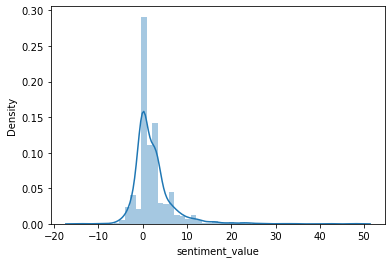

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sentence_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

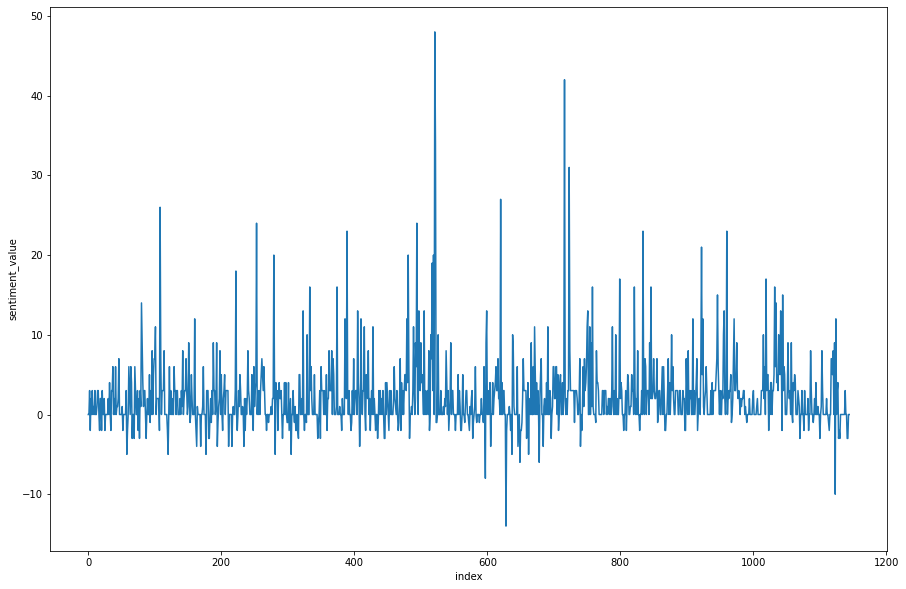

In [45]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sentence_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

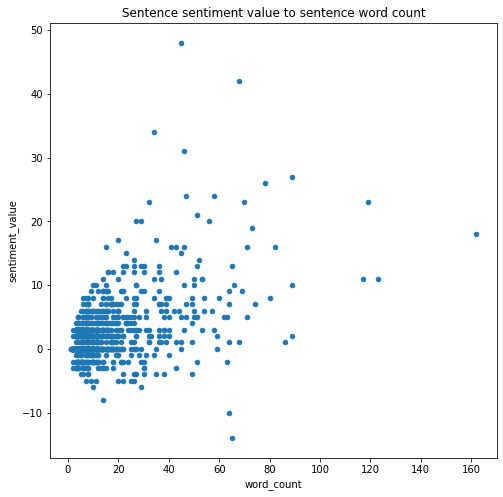

In [46]:
sentence_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

# Word Clouds

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis("off");

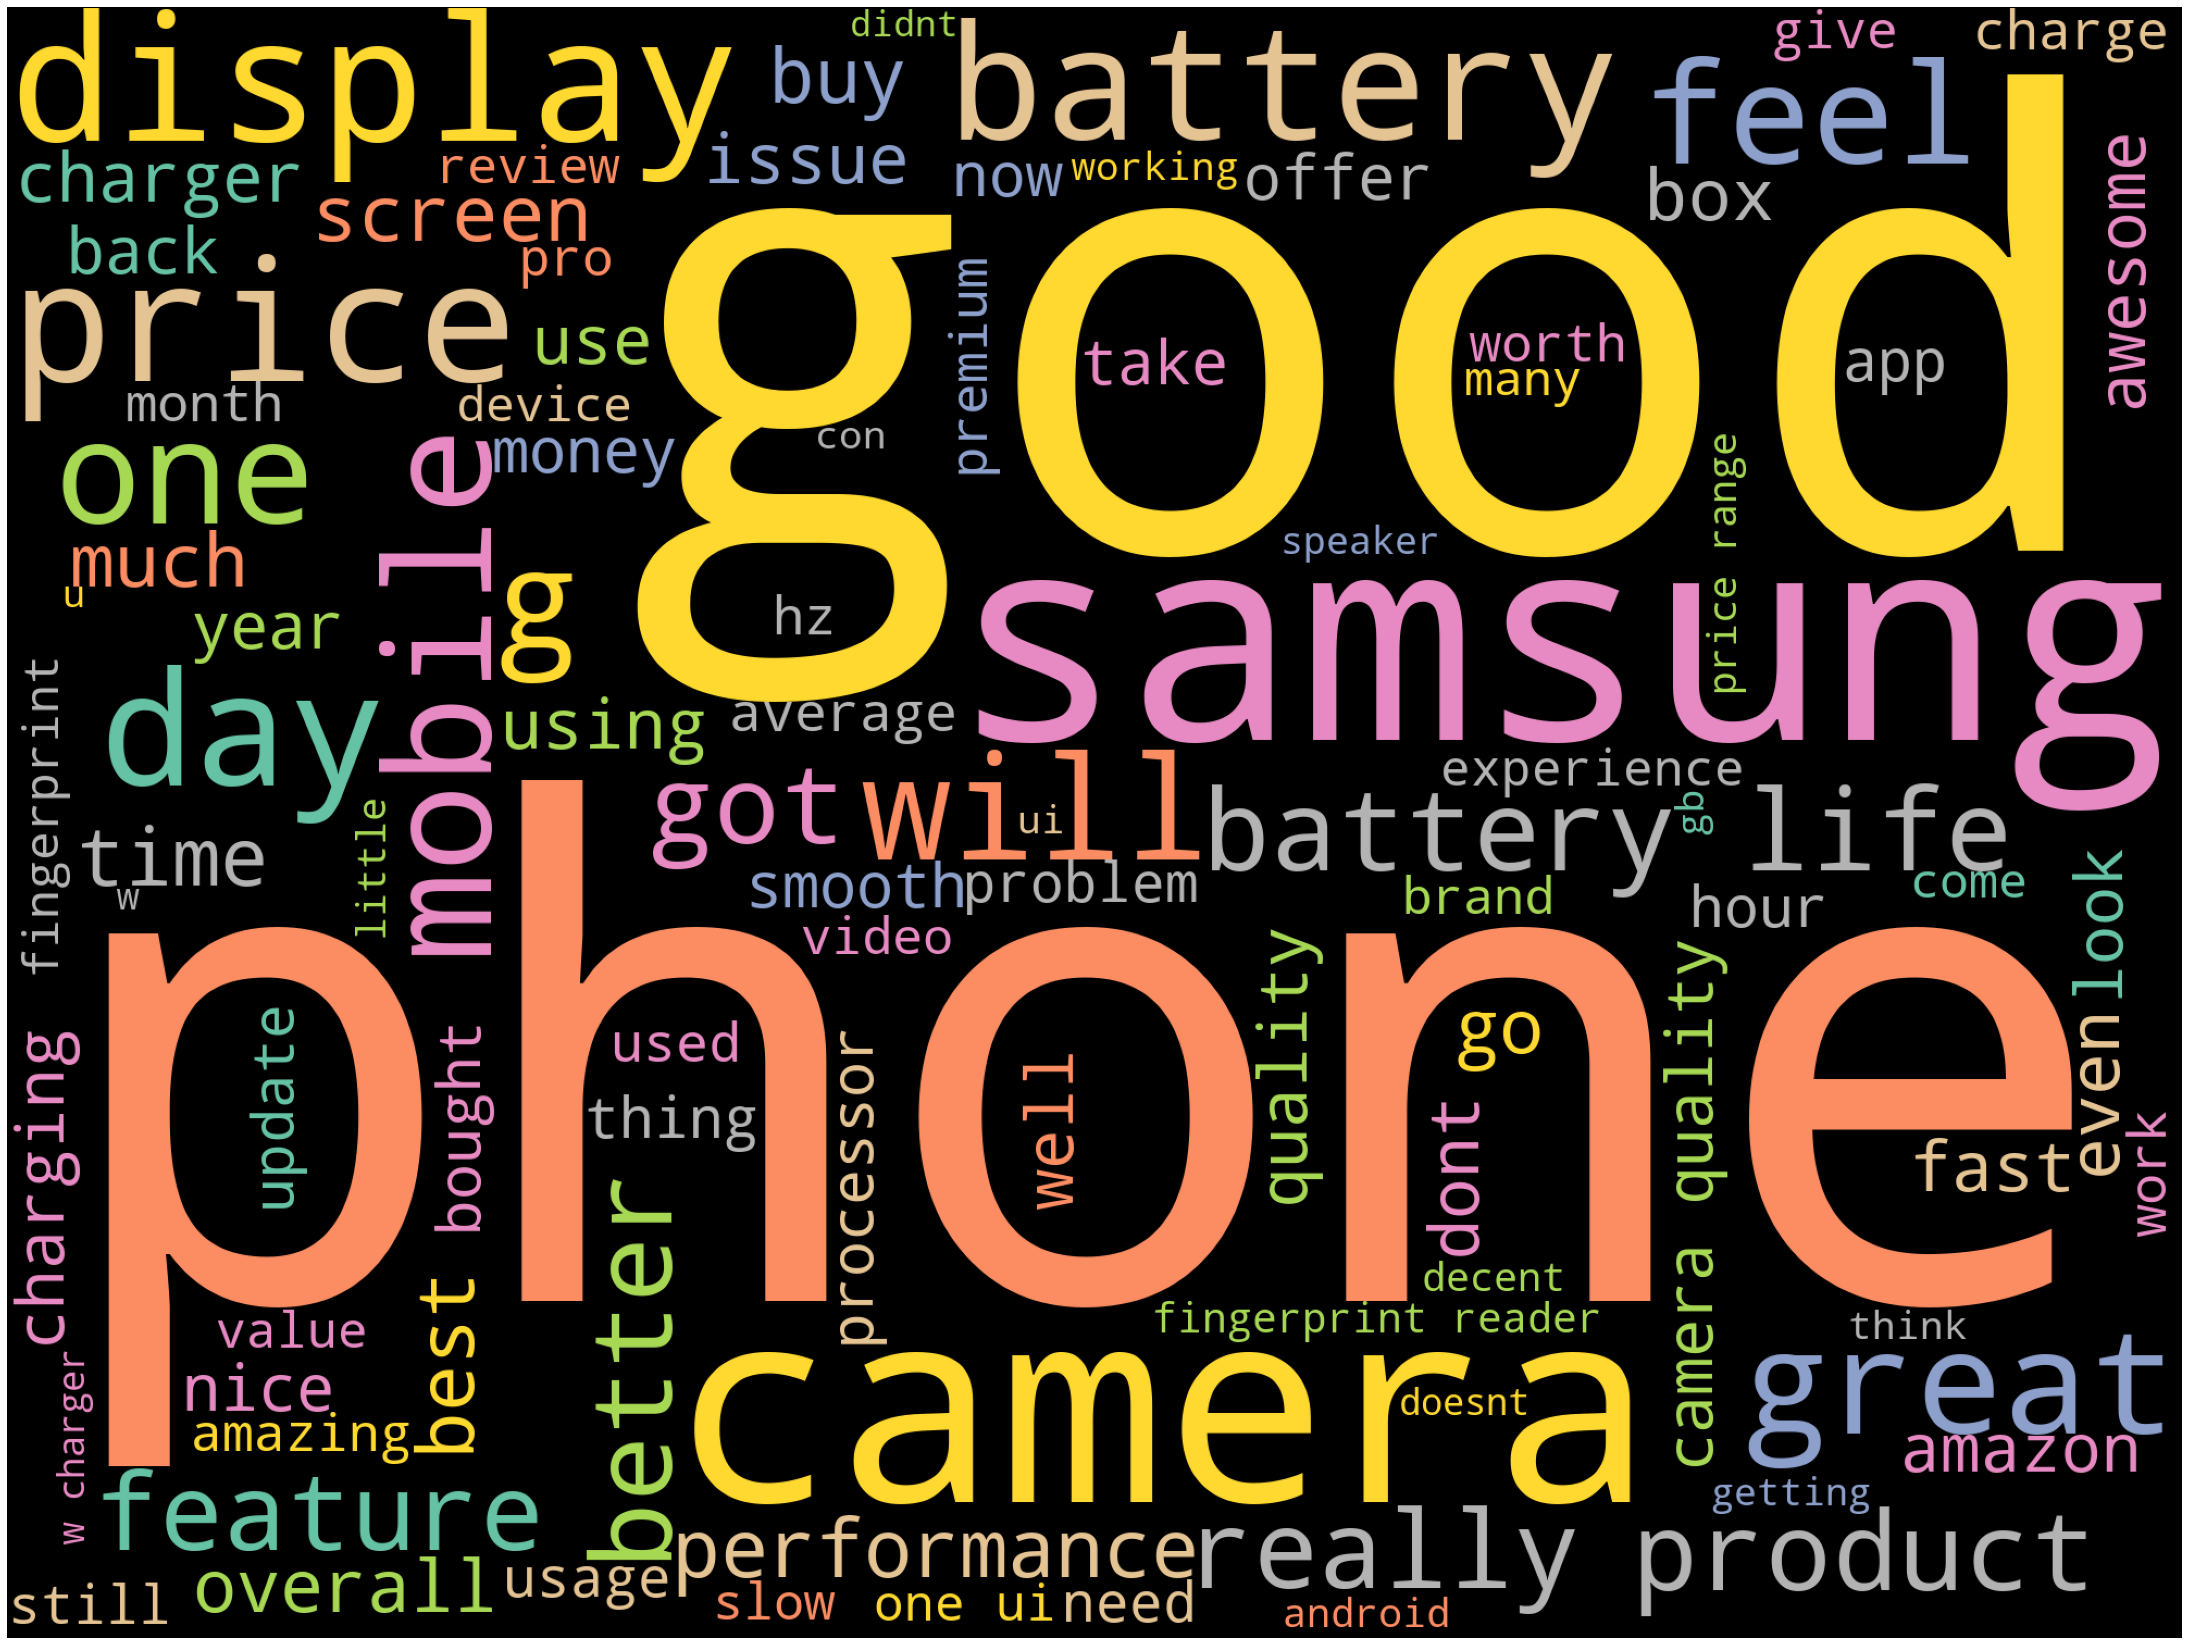

In [49]:
# Generate wordcloud using all the words :
stopwords = STOPWORDS
wordcloud = WordCloud(width = 2000, 
                      height = 1500, 
                      background_color='black',
                      max_words=100,
                      colormap='Set2',stopwords=stopwords).generate(rev_tot)
# Plot
plot_cloud(wordcloud)